<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

# Table of Contents (Code)<a id = "TOP"></a>

#### 1. [Load and Explore the Data](#1)
   - [1.1 Load Packages](#1.1)  
   - [1.2 Load CSVs](#1.2) 
   - [1.3 Define NaNs](#1.3) 
   
#### 2. [Data Wrangling on multiple tables](#2)
   - [2.1 Define Target Variable](#2.1)  
   - [2.2 Load and Clean Tables](#2.2)
      - [2.2.1 Results Table](#2.2.1)
      - [2.2.2 Driver Table](#2.2.2)
      - [2.2.3 Races Table](#2.2.3)
      - [2.2.4 Circuit Table](#2.2.4)
      - [2.2.5 Driver Standings Table](#2.2.5)
      - [2.2.6 Lap Time Table](#2.2.6)
      - [2.2.7 Pit Stop Table](#2.2.7)

#### 3. [Data Exploration](#3)
   - [3.1 Dropping Unattainable Data](#3.1)  
   - [3.2 Visualisations](#3.22)  
      - [3.2.1 Correlation](#3.2.1)
      - [3.2.2 Distribution](#3.2.2)

#### 4. [Outlier Handling](#3)
   - [4.1 Defining Diagnostic Plots](#4.1)  
   - [4.2 Visualise Continuous Variables](#4.2)  
   - [4.3 Outlier Removal Methods](#4.3)  
      - [4.3.1 Capping](#4.3.1)
      - [4.3.2 Winsorization](#4.3.2)

#### 5. [Train Test Split](#5)

#### 6. [Missing Value Imputation](#6)
   - [6.1 Identify NaNs](#6.1)  
   - [6.2 Null Handling](#6.2)  
      - [6.2.1 K-Clustering Imputation](#6.2.1)
      - [6.2.2 Arbitary Number Imputation](#6.2.2)
      - [6.2.3 Random Sampling Imputation](#6.2.3)

#### 7. [Transformation](#7)
   - [7.1 Initalizing Transformers](#7.1)  
   - [7.2 Visualise Changes](#7.2)  

#### 8. [Categorial Encoding](#8)
   - [8.1 Identify Categoricals](#8.1)  
   - [8.2 Encoding](#8.2)  
      - [8.2.1 One-Hot Encoding](#8.2.1)
      - [8.2.2 Frequency Encoding](#8.2.2)

#### 9. [Variable Discretization](#9)
   - [9.1 Initalize Variables](#9.1)  
   - [9.2 Equal Width/Frequency Discretiser](#9.2)  

#### 10. [Scaling](#10)
   - [10.1 Initalize Scaler](#10.1)  
      - [10.1.1 Standard Scaler](#10.1.1)
      - [10.1.2 MinMax Scaler](#10.1.2)
      - [10.1.3 Robust Scaler](#10.1.3)
      - [10.1.4 Maximum Absoulute Scaler](#10.1.4)
      - [10.1.5 Mean Normalisation Scaler](#10.1.5)
   - [10.2 Visualise Scalers](#10.2)  

#### 11. [Machine Learning Modelling](#11)
   - [11.1 Naive BaseLine](#11.1)  
      - [11.1.1 Defining Modal label](#11.1.1)
      - [11.1.2 Prediction](#11.1.2)
   - [11.2 Decision Tree](#11.2)  
      - [11.2.1 Set Up](#11.2.1)
      - [11.2.2 Prediction](#11.2.2)
   - [11.3 Logistic Regression](#11.3)  
      - [11.3.1 Set Up](#1.3.1)
      - [11.3.2 Prediction](#11.3.2)





In [1]:
# this section of code is a series of booleans for adjusting methods used for the final model

# reduce time taken to run all
load_visualisations = True

# choose outlier handling method
# 0 for cap, 1 for winsorization
outlier_method = 0

# make k-clustering run (to save ~12secs in computing)
run_K_Cluster = True

# choose imputation methods
imputation_missing_indicator = True
imputation_arbitary = True

# choose transformer method
# 0 for none, max of 6 
transform_method = 0

# choose discretiser method
# 0 for none, max of 2
discretiser_method = 0

# choose scaler method
# 0 for none, max of 5
scaler_method = 3

# 1 Load and Explore the Data <a id = "1"></a>

## 1.1 Load Packages <a id = "1.1"></a>

In [2]:
# import the packages# import the pacakges
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

# log transformer
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

# reciprocal transformer
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import ReciprocalTransformer

# box-cot transformer
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import BoxCoxTransformer

# yeo johnson transformer
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer

# power transformer/ exponentital 
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import PowerTransformer

from sklearn.model_selection import train_test_split

# to impute missing data with feature-engine
from feature_engine.imputation import AddMissingIndicator

# to impute missing data with feature-engine
from feature_engine.imputation import RandomSampleImputer

from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

# to do K-Clustering with scikit learn
from sklearn.impute import KNNImputer

# to encode with feature-engine
from feature_engine.encoding import CountFrequencyEncoder
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder
from feature_engine.encoding import MeanEncoder

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

# for dashboard
from matplotlib.gridspec import GridSpec

from sklearn.preprocessing import PolynomialFeatures

## 1.2 Load CSVs <a id = "1.2"></a>

In [3]:
# load data
results_mod_data = pd.read_csv('./f1db_csv_mod/results_mod.csv')
circuits_mod_data = pd.read_csv('./f1db_csv_mod/circuits_mod.csv')
constructor_results_mod_data = pd.read_csv('./f1db_csv_mod/constructor_results_mod.csv')
constructor_standings_mod_data = pd.read_csv('./f1db_csv_mod/constructor_standings_mod.csv')
constructors_mod_data = pd.read_csv('./f1db_csv_mod/constructors_mod.csv')
driver_standings_mod_data = pd.read_csv('./f1db_csv_mod/driver_standings_mod.csv')
drivers_mod_data = pd.read_csv('./f1db_csv_mod/drivers_mod.csv')
lap_times_mod_data = pd.read_csv('./f1db_csv_mod/lap_times_mod.csv')
pit_stops_mod_data = pd.read_csv('./f1db_csv_mod/pit_stops_mod.csv')
qualifying_mod_data = pd.read_csv('./f1db_csv_mod/qualifying_mod.csv')
races_mod_data = pd.read_csv('./f1db_csv_mod/races_mod.csv')
results_mod_data = pd.read_csv('./f1db_csv_mod/results_mod.csv')
seasons_mod_data = pd.read_csv('./f1db_csv_mod/seasons_mod.csv')
status_mod_data = pd.read_csv('./f1db_csv_mod/status_mod.csv')

## 1.3 Define NaNs <a id = "1.3"></a>

In [4]:
# replace '\N' values in data with NaN
results_mod_data.replace('\\N',np.nan, inplace=True)
circuits_mod_data.replace('\\N',np.nan, inplace=True)
constructor_results_mod_data.replace('\\N',np.nan, inplace=True)
constructor_standings_mod_data.replace('\\N',np.nan, inplace=True)
constructors_mod_data.replace('\\N',np.nan, inplace=True)
driver_standings_mod_data.replace('\\N',np.nan, inplace=True)
drivers_mod_data.replace('\\N',np.nan, inplace=True)
lap_times_mod_data.replace('\\N',np.nan, inplace=True)
pit_stops_mod_data.replace('\\N',np.nan, inplace=True)
qualifying_mod_data.replace('\\N',np.nan, inplace=True)
races_mod_data.replace('\\N',np.nan, inplace=True)
results_mod_data.replace('\\N',np.nan, inplace=True)
seasons_mod_data.replace('\\N',np.nan, inplace=True)
status_mod_data.replace('\\N',np.nan, inplace=True)

# 2 Data Wrangling on multiple tables  <a id = "2"></a>

## 2.1 Define Target Variable <a id = "2.1"></a>

In [5]:
# change number to the number of positions within the True category of the target variable
# default = 5
max_places = 5

In [6]:
df_main = results_mod_data

In [7]:
# create target variable
conditions = []
values = []

for i in range(max_places):
    conditions.append(df_main['positionOrder']==(i+1))
    values.append(1)

df_main['podium'] = np.select(conditions,values)
df_main.loc[df_main['podium']==1]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,podium
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25364,25370,1072,817,1,3,11,5,5,5,10.0,50,40.121,7615239,43,11,01:32.7,239.725,1,1
25381,25387,1073,1,131,44,2,2,2,2,18.0,58,2.256,5419601,43,3,01:26.6,219.495,1,1
25382,25388,1073,832,6,55,5,3,3,3,15.0,58,5.173,5422518,51,9,01:27.6,216.982,1,1
25383,25389,1073,852,213,22,8,4,4,4,12.0,58,5.692,5423037,50,7,01:27.5,217.285,1,1


## 2.2 Load and Clean Tables <a id = "2.2"></a>

### 2.2.1 Results Table <a id = "2.2.1"></a>

In [8]:
df_main.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10786
positionText           0
positionOrder          0
points                 0
laps                   0
time               18590
milliseconds       18591
fastestLap         18446
rank               18249
fastestLapTime     18446
fastestLapSpeed    18446
statusId               0
podium                 0
dtype: int64

In [9]:
# replace rows with unwinnable states as one category, and retain 'N'(not classified)
# types 'excluded', 'failed to qualify' are known values before the race
replacement_map = {'positionText':{'D':'Active',
                                'E':'Unwinnable',
                                'F':'Unwinnable',
                                'R':'Active',
                                'W':'Active'}}
df_main.replace(replacement_map, inplace=True)

In [10]:
# replace positional numbers as one category 'active'
position_text_uniques = df_main['positionText'].unique()
position_text_num =[]
fill_list=[]
for text in position_text_uniques:
    if text.isdigit()==True:
        position_text_num.append(text)
        fill_list.append('Active')

replace_map = {'positionText':dict(zip(position_text_num, fill_list))}
df_main = df_main.replace(replace_map)

In [11]:
# drop columns with NaN
df_main.drop(columns=['number','position','time','milliseconds','fastestLap','rank','fastestLapTime','fastestLapSpeed'], inplace=True)

### 2.2.2 Driver Table <a id = "2.2.2"></a>

In [12]:
# get columns that are useful + ID
drivers_mod_mergable = drivers_mod_data[['driverId','dob','nationality']]
# merge with results and driver table
df_main = pd.merge(df_main,drivers_mod_mergable,on='driverId',how='left').drop_duplicates()

In [13]:
df_main

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,podium,dob,nationality
0,1,18,1,1,1,Active,1,10.0,58,1,1,1985-01-07,British
1,2,18,2,2,5,Active,2,8.0,58,1,1,1977-05-10,German
2,3,18,3,3,7,Active,3,6.0,58,1,1,1985-06-27,German
3,4,18,4,4,11,Active,4,5.0,58,1,1,1981-07-29,Spanish
4,5,18,5,1,3,Active,5,4.0,58,1,1,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,4,Active,15,0.0,55,5,0,1990-01-26,Mexican
25395,25401,1073,849,3,16,Active,16,0.0,50,3,0,1995-06-29,Canadian
25396,25402,1073,841,51,14,Active,17,0.0,33,6,0,1993-12-14,Italian
25397,25403,1073,847,3,17,Active,18,0.0,26,6,0,1998-02-15,British


### 2.2.3 Races Table <a id = "2.2.3"></a>

In [14]:
# get year data from url as date has nulls
races_mod_data.isnull().sum()

raceId         0
round          0
circuitId      0
name           0
date          10
time         731
url            0
dtype: int64

In [15]:
# get race year from wiki url
# remove url heading
races_mod_data["url"] = races_mod_data['url'].str.replace('http://en.wikipedia.org/wiki/','')
races_mod_data["url"] = races_mod_data['url'].str.replace('https://en.wikipedia.org/wiki/','')
# split to get array with year string
races_mod_data_split = races_mod_data['url'].str.split('_', expand = True)
# replace url column with year string frm array
races_mod_data['raceYear'] = races_mod_data_split[0]

C:\Users\kaiyi\AppData\Local\Temp/ipykernel_21476/4117135757.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  races_mod_data["url"] = races_mod_data['url'].str.replace('http://en.wikipedia.org/wiki/','')
C:\Users\kaiyi\AppData\Local\Temp/ipykernel_21476/4117135757.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  races_mod_data["url"] = races_mod_data['url'].str.replace('https://en.wikipedia.org/wiki/','')


In [16]:
# verify dates
raceYearUniques = races_mod_data['raceYear'].unique()
raceYearUniques

array(['2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002',
       '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994',
       '1993', '1992', '1991', '1990', '2010', '1989', '1988', '1987',
       '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979',
       '1978', '1977', '1976', '1975', '1974', '1973', '1972', '1971',
       '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955',
       '1954', '1953', '1952', '1951', '1950', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '70th',
       '2021', '2022', 'São'], dtype=object)

In [17]:
# get index of incorrect raceYear and replace with year from 'date' col
indexes = []
for year in raceYearUniques:
    # if year is not all digits
    if year.isdigit()==False:
        # get index of row
        index = races_mod_data[races_mod_data['raceYear']==year].index[0]
        # replace bad url year data with date column
        races_mod_data.replace(races_mod_data.loc[index,'raceYear'],races_mod_data.loc[index,'date'].split('/')[2],inplace=True)


In [18]:
# cast into int and verify
races_mod_data['raceYear'] = races_mod_data['raceYear'].astype(int)
raceYearUniques = races_mod_data['raceYear'].unique()
raceYearUniques

array([2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999,
       1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 2010, 1989,
       1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978,
       1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967,
       1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956,
       1955, 1954, 1953, 1952, 1951, 1950, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [19]:
# merge race year col into main df
races_mod_mergable = races_mod_data[['raceId','raceYear','circuitId']]
# merge with results and driver table
df_main = pd.merge(df_main,races_mod_mergable,on='raceId',how='left').drop_duplicates()

In [20]:
df_main

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,podium,dob,nationality,raceYear,circuitId
0,1,18,1,1,1,Active,1,10.0,58,1,1,1985-01-07,British,2008,1
1,2,18,2,2,5,Active,2,8.0,58,1,1,1977-05-10,German,2008,1
2,3,18,3,3,7,Active,3,6.0,58,1,1,1985-06-27,German,2008,1
3,4,18,4,4,11,Active,4,5.0,58,1,1,1981-07-29,Spanish,2008,1
4,5,18,5,1,3,Active,5,4.0,58,1,1,1981-10-19,Finnish,2008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,4,Active,15,0.0,55,5,0,1990-01-26,Mexican,2021,24
25395,25401,1073,849,3,16,Active,16,0.0,50,3,0,1995-06-29,Canadian,2021,24
25396,25402,1073,841,51,14,Active,17,0.0,33,6,0,1993-12-14,Italian,2021,24
25397,25403,1073,847,3,17,Active,18,0.0,26,6,0,1998-02-15,British,2021,24


In [21]:
# get age of driver at time of race
# split to get array with year string
df_main_dob_year_split = df_main['dob'].str.split('-', expand=True)

# replace get only year in a month
df_main['dob_year'] = df_main_dob_year_split[0].astype(int)
# create driverAge col
df_main['driverAge'] = df_main['raceYear'] - df_main["dob_year"]

In [22]:
df_main.drop(columns=['dob','dob_year'],inplace= True)

In [23]:
df_main

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,podium,nationality,raceYear,circuitId,driverAge
0,1,18,1,1,1,Active,1,10.0,58,1,1,British,2008,1,23
1,2,18,2,2,5,Active,2,8.0,58,1,1,German,2008,1,31
2,3,18,3,3,7,Active,3,6.0,58,1,1,German,2008,1,23
3,4,18,4,4,11,Active,4,5.0,58,1,1,Spanish,2008,1,27
4,5,18,5,1,3,Active,5,4.0,58,1,1,Finnish,2008,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25394,25400,1073,815,9,4,Active,15,0.0,55,5,0,Mexican,2021,24,31
25395,25401,1073,849,3,16,Active,16,0.0,50,3,0,Canadian,2021,24,26
25396,25402,1073,841,51,14,Active,17,0.0,33,6,0,Italian,2021,24,28
25397,25403,1073,847,3,17,Active,18,0.0,26,6,0,British,2021,24,23


### 2.2.4 Circuit Table <a id = "2.2.4"></a>

In [24]:
# check nulls
circuits_mod_data.isnull().sum()

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           2
url           0
dtype: int64

In [25]:
# merge race year col into main df
circuits_mod_mergable = circuits_mod_data[['circuitId','alt','country']]
# merge with results and driver table
df_main = pd.merge(df_main,circuits_mod_mergable,on='circuitId',how='left').drop_duplicates()

In [26]:
# check nulls
df_main.isnull().sum()

resultId          0
raceId            0
driverId          0
constructorId     0
grid              0
positionText      0
positionOrder     0
points            0
laps              0
statusId          0
podium            0
nationality       0
raceYear          0
circuitId         0
driverAge         0
alt              20
country           0
dtype: int64

In [27]:
# drop null rows
df_main.dropna(inplace=True)

In [28]:
# cast into intger
df_main['alt'] = df_main['alt'].astype(int)

### 2.2.5 Driver Standings Table <a id = "2.2.5"></a>

In [29]:
# check nulls
driver_standings_mod_data.isnull().sum()

driverStandingsId    0
raceId               0
driverId             0
points               5
position             0
positionText         0
wins                 0
dtype: int64

In [30]:
driver_standings_mod_data

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10,1,1,1
1,2,18,2,8,2,2,0
2,3,18,3,6,3,3,0
3,4,18,4,5,4,4,0
4,5,18,5,4,5,5,0
...,...,...,...,...,...,...,...
33389,70776,1074,840,0,16,-,0
33390,70777,1074,852,0,17,-,0
33391,70778,1074,830,0,18,-,0
33392,70779,1074,20,0,19,-,0


In [31]:
# create if within target variable for season column
conditions = []
values = []
for i in range(max_places):
    conditions.append(driver_standings_mod_data['position']==(i+1))
    values.append(1)
driver_standings_mod_data['podium'] = np.select(conditions,values)
driver_standings_mod_data.loc[driver_standings_mod_data['podium']==1]

driver_standings_mod_data['seasonalPodium'] = np.select(conditions,values)
driver_standings_mod_data

,driverStandingsId,raceId,driverId,points,position,positionText,wins,podium,seasonalPodium
0,1,18,1,10,1,1,1,1,1
1,2,18,2,8,2,2,0,1,1
2,3,18,3,6,3,3,0,1,1
3,4,18,4,5,4,4,0,1,1
4,5,18,5,4,5,5,0,1,1
...,...,...,...,...,...,...,...,...,...
33389,70776,1074,840,0,16,-,0,0,0
33390,70777,1074,852,0,17,-,0,0,0
33391,70778,1074,830,0,18,-,0,0,0
33392,70779,1074,20,0,19,-,0,0,0


In [32]:
driver_standings_mod_mergable = driver_standings_mod_data[['raceId','driverId','seasonalPodium']]

In [33]:
# merge with a temp main df
df_main_temp = df_main.copy()
df_main_temp = pd.merge(df_main, driver_standings_mod_mergable,  how='left', left_on=['raceId','driverId'], right_on = ['raceId','driverId']).drop_duplicates()
df_main_temp

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,podium,nationality,raceYear,circuitId,driverAge,alt,country,seasonalPodium
0,1,18,1,1,1,Active,1,10.0,58,1,1,British,2008,1,23,10,Australia,1.0
1,2,18,2,2,5,Active,2,8.0,58,1,1,German,2008,1,31,10,Australia,1.0
2,3,18,3,3,7,Active,3,6.0,58,1,1,German,2008,1,23,10,Australia,1.0
3,4,18,4,4,11,Active,4,5.0,58,1,1,Spanish,2008,1,27,10,Australia,1.0
4,5,18,5,1,3,Active,5,4.0,58,1,1,Finnish,2008,1,27,10,Australia,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25374,25400,1073,815,9,4,Active,15,0.0,55,5,0,Mexican,2021,24,31,3,UAE,1.0
25375,25401,1073,849,3,16,Active,16,0.0,50,3,0,Canadian,2021,24,26,3,UAE,0.0
25376,25402,1073,841,51,14,Active,17,0.0,33,6,0,Italian,2021,24,28,3,UAE,0.0
25377,25403,1073,847,3,17,Active,18,0.0,26,6,0,British,2021,24,23,3,UAE,0.0


In [34]:
# check number of nans
df_main_temp[df_main_temp.isna().any(axis=1)].count()

resultId          481
raceId            481
driverId          481
constructorId     481
grid              481
positionText      481
positionOrder     481
points            481
laps              481
statusId          481
podium            481
nationality       481
raceYear          481
circuitId         481
driverAge         481
alt               481
country           481
seasonalPodium      0
dtype: int64

In [35]:
# drop nans
df_main = df_main_temp.dropna()

In [36]:
# confirm no nans
df_main.isnull().sum()

resultId          0
raceId            0
driverId          0
constructorId     0
grid              0
positionText      0
positionOrder     0
points            0
laps              0
statusId          0
podium            0
nationality       0
raceYear          0
circuitId         0
driverAge         0
alt               0
country           0
seasonalPodium    0
dtype: int64

### 2.2.6 Lap Time Table <a id = "2.2.6"></a>

In [37]:
# check for nulls
lap_times_mod_data.isnull().sum()

raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64

In [38]:
lap_times_mod_data

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
514587,1073,847,22,15,1:30.821,90821
514588,1073,847,23,15,1:30.647,90647
514589,1073,847,24,14,1:31.577,91577
514590,1073,847,25,16,1:32.794,92794


In [39]:
# group by raceId and driverId
lap_times_mod_mergable = lap_times_mod_data.groupby(['raceId','driverId']).agg({'milliseconds':['mean']})
lap_times_mod_mergable

milliseconds
                         mean
raceId driverId              
1      1         97563.758621
       2         97635.672414
       3         97612.172414
       4         97597.637931
       6         91822.235294
...                       ...
1073   846       94423.189655
       847       95032.884615
       849       92309.820000
       852       93500.637931
       854       95192.052632

[9717 rows x 1 columns]

In [40]:
# reset index so raceID and driverID is a col
lap_times_mod_mergable.reset_index(level=['raceId', 'driverId'],inplace=True)
# remove multilevel crazy stuff
lap_times_mod_mergable.columns = lap_times_mod_mergable.columns.droplevel(1)
# round floats to ints
lap_times_mod_mergable['milliseconds'] = lap_times_mod_mergable['milliseconds'].apply(np.int64)
# rename to col
lap_times_mod_mergable.rename(columns={'milliseconds':'lapTime'}, inplace=True)
lap_times_mod_mergable

,raceId,driverId,lapTime
0,1,1,97563
1,1,2,97635
2,1,3,97612
3,1,4,97597
4,1,6,91822
...,...,...,...
9712,1073,846,94423
9713,1073,847,95032
9714,1073,849,92309
9715,1073,852,93500


In [41]:
df_main_temp = df_main.copy()
df_main_temp = pd.merge(df_main, lap_times_mod_mergable,  how='left', left_on=['raceId','driverId'], right_on = ['raceId','driverId']).drop_duplicates()
# df_main = pd.merge(df_main, lap_times_mod_mergable,  how='left', on=['raceId','driverId']).drop_duplicates()

In [42]:
# check number of nulls in rows
df_main_temp[df_main_temp.isna().any(axis=1)]

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,podium,nationality,raceYear,circuitId,driverAge,alt,country,seasonalPodium,lapTime
25,44,19,7,5,18,Active,22,0.0,0,20,0,French,2008,2,29,18,Malaysia,0.0,NaN
67,87,21,16,10,20,Active,21,0.0,0,4,0,German,2008,4,25,109,Spain,0.0,NaN
87,108,22,21,10,20,Active,20,0.0,0,4,0,Italian,2008,5,35,130,Turkey,0.0,NaN
166,187,26,20,5,8,Active,19,0.0,0,4,0,German,2008,9,21,153,UK,0.0,NaN
167,188,26,14,9,11,Active,20,0.0,0,4,0,British,2008,9,37,153,UK,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24696,25183,1062,844,6,7,Active,18,0.0,0,4,0,Monegasque,2021,11,24,264,Hungary,0.0,NaN
24697,25184,1062,840,117,12,Active,19,0.0,0,4,0,Canadian,2021,11,23,264,Hungary,0.0,NaN
24758,25245,1065,852,213,0,Active,20,0.0,0,23,0,Japanese,2021,14,21,162,Italy,0.0,NaN
24837,25324,1070,854,210,14,Active,19,0.0,0,4,0,German,2021,32,22,2227,Mexico,0.0,NaN


In [43]:
df_main = df_main_temp

### 2.2.7 Pit Stop Table <a id = "2.2.7"></a>

In [44]:
# check nulls
pit_stops_mod_data.isnull().sum()

raceId          0
driverId        0
stop            0
lap             0
time            0
duration        0
milliseconds    0
dtype: int64

In [45]:
pit_stops_mod_data

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8823,1073,840,2,52,18:22:55,22.661,22661
8824,1073,815,3,53,18:23:09,21.385,21385
8825,1073,854,2,52,18:23:42,22.070,22070
8826,1073,852,2,53,18:24:01,21.909,21909


In [46]:
# group by raceId and driverId
pit_stops_mod_mergable = pit_stops_mod_data.groupby(['raceId','driverId']).agg({'milliseconds':['count']})
pit_stops_mod_mergable

milliseconds
                       count
raceId driverId             
841    1                   2
       2                   2
       3                   1
       4                   3
       5                   1
...                      ...
1073   844                 2
       846                 2
       849                 1
       852                 2
       854                 2

[4291 rows x 1 columns]

In [47]:
# reset index so raceID and driverID is a col
pit_stops_mod_mergable.reset_index(level=['raceId', 'driverId'],inplace=True)
# remove multilevel crazy stuff
pit_stops_mod_mergable.columns = pit_stops_mod_mergable.columns.droplevel(1)
# round floats to ints
pit_stops_mod_mergable['milliseconds'] = pit_stops_mod_mergable['milliseconds'].apply(np.int64)
# rename col
pit_stops_mod_mergable.rename(columns={'milliseconds':'pitStopCount'}, inplace=True)
pit_stops_mod_mergable

,raceId,driverId,pitStopCount
0,841,1,2
1,841,2,2
2,841,3,1
3,841,4,3
4,841,5,1
...,...,...,...
4286,1073,844,2
4287,1073,846,2
4288,1073,849,1
4289,1073,852,2


In [48]:
df_main_temp = df_main.copy()
df_main_temp = pd.merge(df_main, pit_stops_mod_mergable,  how='left', left_on=['raceId','driverId'], right_on = ['raceId','driverId']).drop_duplicates()
# df_main = pd.merge(df_main, lap_times_mod_mergable,  how='left', on=['raceId','driverId']).drop_duplicates()

In [49]:
# check number of nans
df_main_temp[df_main_temp.isna().any(axis=1)]

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,podium,nationality,raceYear,circuitId,driverAge,alt,country,seasonalPodium,lapTime,pitStopCount
0,1,18,1,1,1,Active,1,10.0,58,1,1,British,2008,1,23,10,Australia,1.0,98114.0,NaN
1,2,18,2,2,5,Active,2,8.0,58,1,1,German,2008,1,31,10,Australia,1.0,98208.0,NaN
2,3,18,3,3,7,Active,3,6.0,58,1,1,German,2008,1,23,10,Australia,1.0,98254.0,NaN
3,4,18,4,4,11,Active,4,5.0,58,1,1,Spanish,2008,1,27,10,Australia,1.0,98410.0,NaN
4,5,18,5,1,3,Active,5,4.0,58,1,1,Finnish,2008,1,27,10,Australia,1.0,98424.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24788,25275,1067,839,214,12,Active,10,1.0,57,11,0,French,2021,5,25,130,Turkey,0.0,96049.0,NaN
24837,25324,1070,854,210,14,Active,19,0.0,0,4,0,German,2021,32,22,2227,Mexico,0.0,NaN,NaN
24838,25325,1070,852,213,17,Active,20,0.0,0,4,0,Japanese,2021,32,21,2227,Mexico,0.0,NaN,NaN
24878,25385,1072,854,210,19,Active,20,0.0,8,3,0,German,2021,77,22,15,Saudi Arabia,0.0,98543.0,NaN


In [50]:
df_main = df_main_temp

In [51]:
df_main

,resultId,raceId,driverId,constructorId,grid,positionText,positionOrder,points,laps,statusId,podium,nationality,raceYear,circuitId,driverAge,alt,country,seasonalPodium,lapTime,pitStopCount
0,1,18,1,1,1,Active,1,10.0,58,1,1,British,2008,1,23,10,Australia,1.0,98114.0,NaN
1,2,18,2,2,5,Active,2,8.0,58,1,1,German,2008,1,31,10,Australia,1.0,98208.0,NaN
2,3,18,3,3,7,Active,3,6.0,58,1,1,German,2008,1,23,10,Australia,1.0,98254.0,NaN
3,4,18,4,4,11,Active,4,5.0,58,1,1,Spanish,2008,1,27,10,Australia,1.0,98410.0,NaN
4,5,18,5,1,3,Active,5,4.0,58,1,1,Finnish,2008,1,27,10,Australia,1.0,98424.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24893,25400,1073,815,9,4,Active,15,0.0,55,5,0,Mexican,2021,24,31,3,UAE,1.0,91864.0,3.0
24894,25401,1073,849,3,16,Active,16,0.0,50,3,0,Canadian,2021,24,26,3,UAE,0.0,92309.0,1.0
24895,25402,1073,841,51,14,Active,17,0.0,33,6,0,Italian,2021,24,28,3,UAE,0.0,91524.0,1.0
24896,25403,1073,847,3,17,Active,18,0.0,26,6,0,British,2021,24,23,3,UAE,0.0,95032.0,NaN


In [52]:
# drop col that cannot be obtained before a race/ are not useful
df_main.drop(columns=['resultId','statusId','positionOrder','points','laps','raceId'], inplace=True)

# 3 Data Exploration <a id = "3"></a>

## 3.1 Dropping Unattainable Data <a id = "3.1"></a>

In [53]:
# create copy for naive baseline + report visuals
df_naive_baseline = df_main.copy()
# df_naive_baseline.to_csv('./pain.csv')

In [54]:
df_main

,driverId,constructorId,grid,positionText,podium,nationality,raceYear,circuitId,driverAge,alt,country,seasonalPodium,lapTime,pitStopCount
0,1,1,1,Active,1,British,2008,1,23,10,Australia,1.0,98114.0,NaN
1,2,2,5,Active,1,German,2008,1,31,10,Australia,1.0,98208.0,NaN
2,3,3,7,Active,1,German,2008,1,23,10,Australia,1.0,98254.0,NaN
3,4,4,11,Active,1,Spanish,2008,1,27,10,Australia,1.0,98410.0,NaN
4,5,1,3,Active,1,Finnish,2008,1,27,10,Australia,1.0,98424.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24893,815,9,4,Active,0,Mexican,2021,24,31,3,UAE,1.0,91864.0,3.0
24894,849,3,16,Active,0,Canadian,2021,24,26,3,UAE,0.0,92309.0,1.0
24895,841,51,14,Active,0,Italian,2021,24,28,3,UAE,0.0,91524.0,1.0
24896,847,3,17,Active,0,British,2021,24,23,3,UAE,0.0,95032.0,NaN


## 3.2 Visualisations <a id = "3.2"></a>

### 3.2.1 Correlation <a id = "3.2.1"></a>

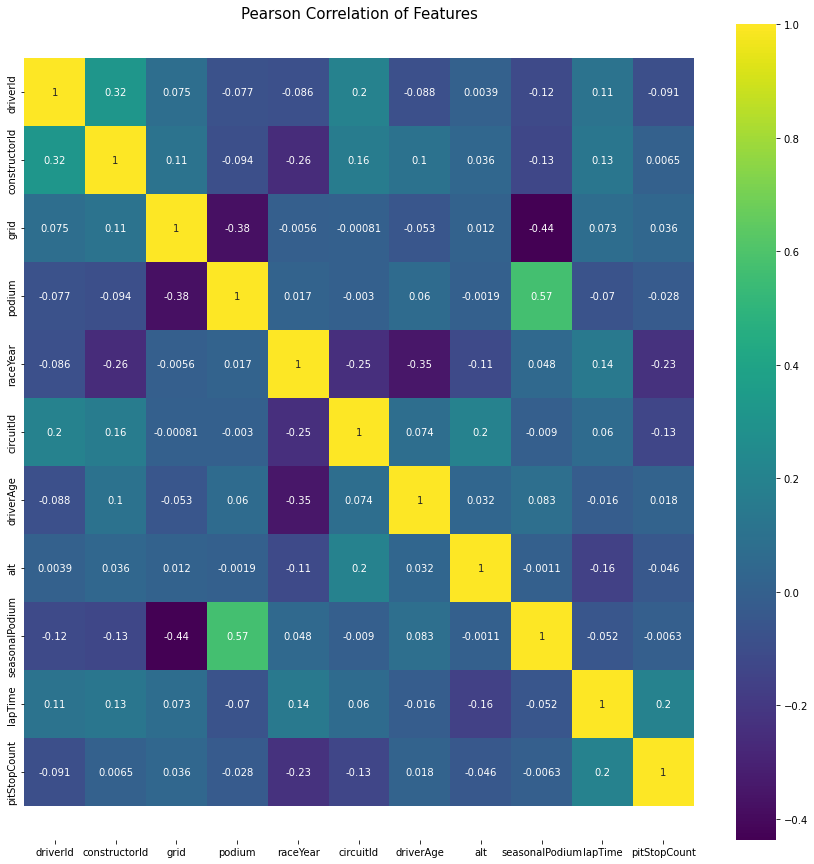

In [55]:
if load_visualisations:
    # heatmap visualization
    colormap = plt.cm.viridis
    plt.figure(figsize=(15,15))
    plt.title('Pearson Correlation of Features', size=15)
    ax = sns.heatmap(df_naive_baseline.corr(), cmap=colormap, annot=True)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()

### 3.2.2 Distribution <a id = "3.2.2"></a>

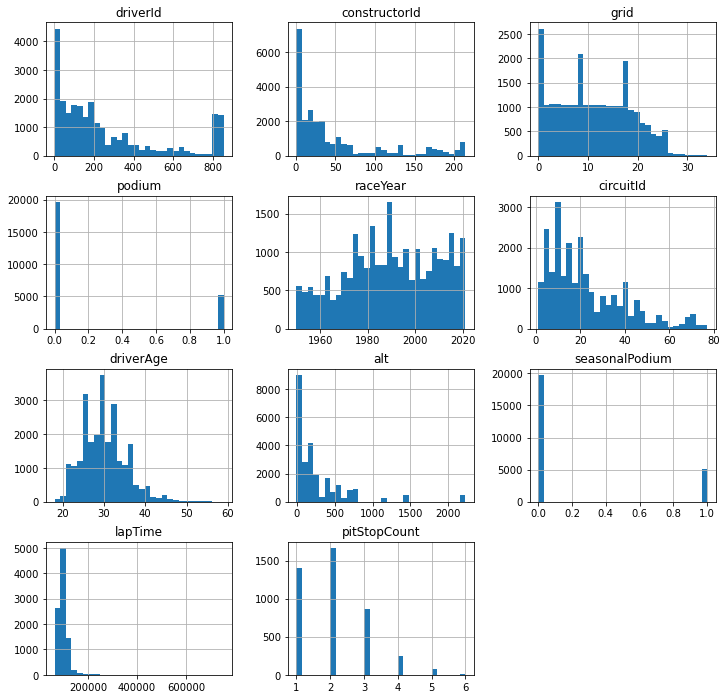

In [56]:
if load_visualisations:
    # histograms
    df_naive_baseline.hist(bins=30, figsize=(12,12))
plt.show()

# 4 Outlier Handling <a id = "4"></a>

## 4.1 Defining Diagnostic Plots <a id = "4.1"></a>

In [57]:
# function to create histogram, Q-Q plot and boxplot.

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.suptitle(variable)

    plt.show()

In [58]:
# function to create before and after histogram
def before_after_histogram(df_before,df_after, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df_before[variable], bins=30)
    plt.title('Before')

    # histogram
    plt.subplot(1, 2, 2)
    sns.distplot(df_after[variable], bins=30)
    plt.title('After')

    plt.suptitle(variable)

    plt.show()

In [59]:
df_main

,driverId,constructorId,grid,positionText,podium,nationality,raceYear,circuitId,driverAge,alt,country,seasonalPodium,lapTime,pitStopCount
0,1,1,1,Active,1,British,2008,1,23,10,Australia,1.0,98114.0,NaN
1,2,2,5,Active,1,German,2008,1,31,10,Australia,1.0,98208.0,NaN
2,3,3,7,Active,1,German,2008,1,23,10,Australia,1.0,98254.0,NaN
3,4,4,11,Active,1,Spanish,2008,1,27,10,Australia,1.0,98410.0,NaN
4,5,1,3,Active,1,Finnish,2008,1,27,10,Australia,1.0,98424.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24893,815,9,4,Active,0,Mexican,2021,24,31,3,UAE,1.0,91864.0,3.0
24894,849,3,16,Active,0,Canadian,2021,24,26,3,UAE,0.0,92309.0,1.0
24895,841,51,14,Active,0,Italian,2021,24,28,3,UAE,0.0,91524.0,1.0
24896,847,3,17,Active,0,British,2021,24,23,3,UAE,0.0,95032.0,NaN


## 4.2 Visualise Continuous Variables <a id = "4.2"></a>

In [60]:
# get continuous variables
data_transformable = df_main[['grid','driverAge','alt','lapTime']].copy()
data_transformable

,grid,driverAge,alt,lapTime
0,1,23,10,98114.0
1,5,31,10,98208.0
2,7,23,10,98254.0
3,11,27,10,98410.0
4,3,27,10,98424.0
...,...,...,...,...
24893,4,31,3,91864.0
24894,16,26,3,92309.0
24895,14,28,3,91524.0
24896,17,23,3,95032.0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


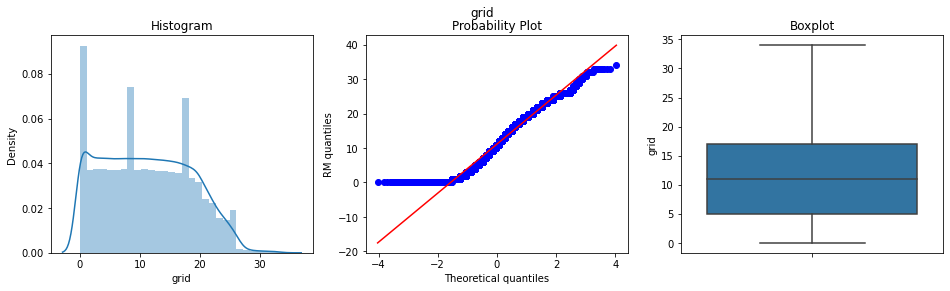

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


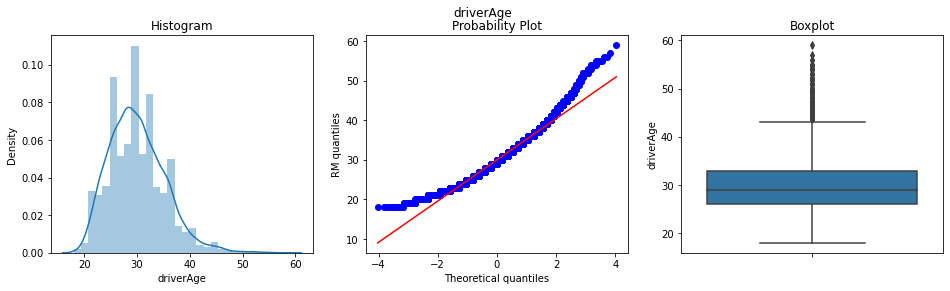

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


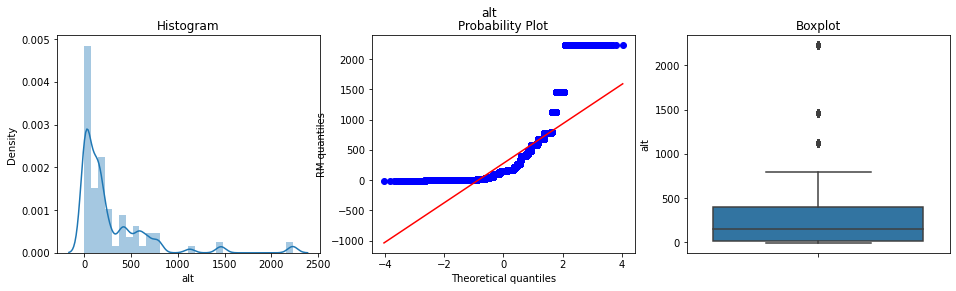

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


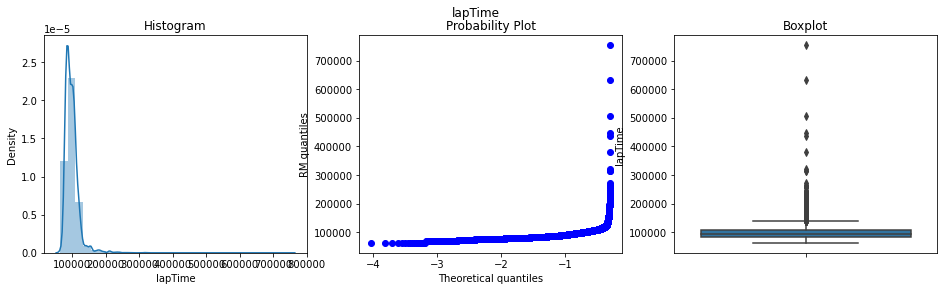

In [61]:
# let's find visualise the distributions
if load_visualisations:
    for cols in data_transformable:
        diagnostic_plots(data_transformable, cols)

## 4.3 Outlier Removal Methods <a id = "4.3"></a>

### 4.3.1 Capping <a id = "4.3.1"></a>

In [62]:
def find_upper_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary

In [63]:
# define transformable
data_transformable = data_transformable[['grid','lapTime']]

In [64]:
# let's flag the outliers in the data

flaged_outliers = []

for col in data_transformable:

    # get upper limits
    upper_limit = find_upper_boundaries(data_transformable, col, 1.5)
    print(upper_limit)
    # flag outliers
    outliers = np.where(data_transformable[col] > upper_limit, True, False)

    flaged_outliers.append(outliers)

35.0
138436.5


In [65]:
unique, counts = np.unique(flaged_outliers[0], return_counts=True)
dict(zip(unique, counts))

{False: 24898}

In [66]:
# let's trim the dataset by removing only Item Visibility outliers
df_capping = df_main.copy()

df_capping = df_capping.loc[~(flaged_outliers[0]+flaged_outliers[1])]

print(df_capping.shape)
print(df_main.shape)
print('Rows Lost: '+str((df_main.shape[0]-df_capping.shape[0])))

(24567, 14)
(24898, 14)
Rows Lost: 331


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


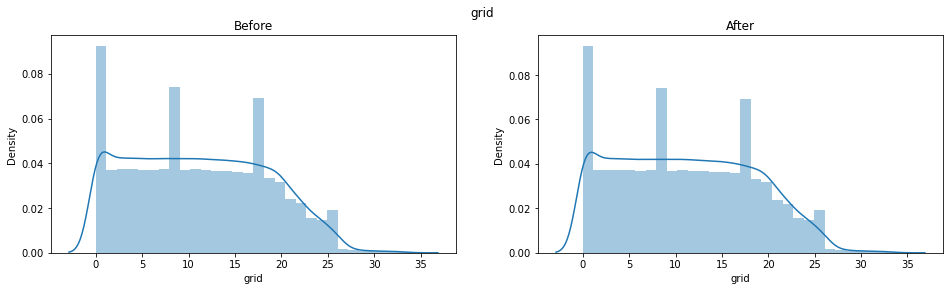

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


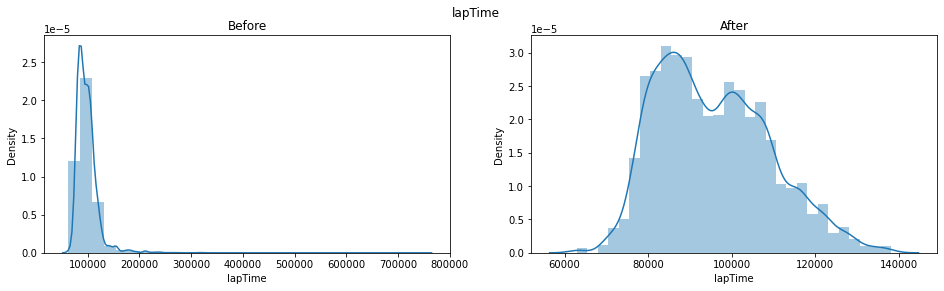

In [67]:
if load_visualisations:
    for col in data_transformable:
        before_after_histogram(df_main,df_capping,col)

### 4.3.2 Winsorization <a id = "4.3.2"></a>

In [68]:
def winsorise(df, variable, upper_limit):
    return np.where(df[variable] > upper_limit, upper_limit, df[variable])

In [69]:
# Now let's replace the outliers by the percentiles
df_winsorise = df_main.copy()

for col in data_transformable:
    df_winsorise[col]= winsorise(df_main, col,df_main[col].quantile(0.95))

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


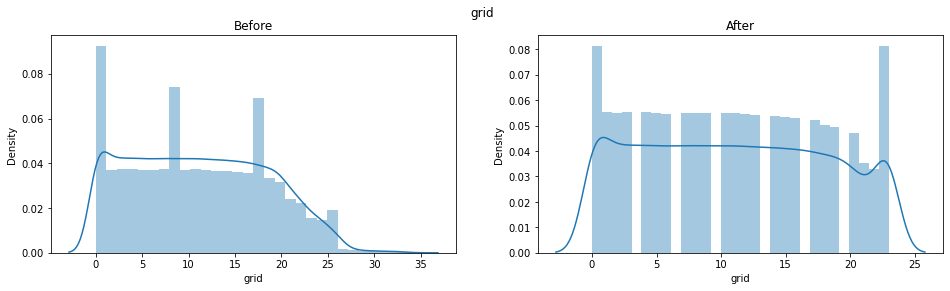

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


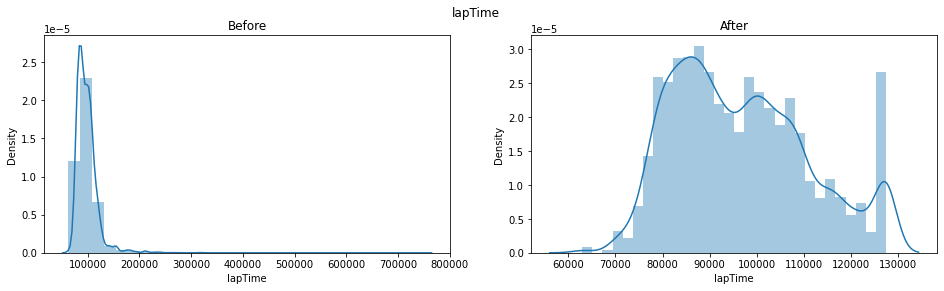

In [70]:
if load_visualisations:
    for col in data_transformable:
        before_after_histogram(df_main,df_winsorise,col)

In [71]:
if outlier_method != 1:
    df_main=df_winsorise
else:
    df_main=df_capping

# 5 Train Test Split  <a id = "5"></a>

In [72]:
data = df_main
X_train, X_test, y_train, y_test = train_test_split(data.drop('podium', axis=1),
                                                    data['podium'], 
                                                    test_size=0.3, 
                                                    random_state=1)#9 HAS NO ISSUES WITH ONE HOT

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17428, 13), (7470, 13), (17428,), (7470,))

# 6 Missing Value Imputation  <a id = "6"></a>

## 6.1 Identify NaNs  <a id = "6.1"></a>

In [73]:
X_train.isnull().sum()

driverId              0
constructorId         0
grid                  0
positionText          0
nationality           0
raceYear              0
circuitId             0
driverAge             0
alt                   0
country               0
seasonalPodium        0
lapTime           10775
pitStopCount      14384
dtype: int64

## 6.2 Null Handling  <a id = "6.2"></a>

### 6.2.1 K-Clustering Imputation  <a id = "6.2.1"></a>

In [74]:
if run_K_Cluster:
    X_train.sort_values(by='circuitId', inplace=True)
    X_test.sort_values(by='circuitId', inplace=True)
    # create an object for KNNImputer
    imputer = KNNImputer(n_neighbors=5,weights='uniform')
    # create subsets
    X_train_before_imputer = X_train[['lapTime']].copy()
    X_test_before_imputer = X_train[['lapTime']].copy()
    # fit
    imputer.fit(X_train_before_imputer)

In [75]:
if run_K_Cluster:
    # transform
    X_train_after_KNNImputer = imputer.transform(X_train_before_imputer)
    X_test_after_KNNImputer = imputer.transform(X_test_before_imputer)

In [76]:
if run_K_Cluster:
    # recreate df
    X_train_after_KNNImputer = pd.DataFrame(data=X_train_after_KNNImputer,columns=['lapTime'])
    X_test_after_KNNImputer = pd.DataFrame(data=X_train_after_KNNImputer,columns=['lapTime'])

### 6.2.2 Arbitary Number Imputation <a id = "6.2.2"></a>

In [77]:
# group by circuit
X_train_mean_circuit = X_train.groupby(['circuitId']).agg({'lapTime':['median'],'pitStopCount':['median']})
# reset index so raceID and driverID is a col
X_train_mean_circuit.reset_index(level=['circuitId'],inplace=True)
# remove multilevel crazy stuff
X_train_mean_circuit.columns = X_train_mean_circuit.columns.droplevel(1)
X_train_mean_circuit

,circuitId,lapTime,pitStopCount
0,1,97480.0,2.0
1,2,106044.5,3.0
2,3,100348.5,2.0
3,4,89246.5,2.0
4,5,93628.0,2.0
...,...,...,...
70,71,106255.5,1.0
71,73,122136.0,2.0
72,75,86532.0,3.0
73,76,127451.8,5.0


In [78]:
X_train_mean_circuit[X_train_mean_circuit.isna().any(axis=1)]

,circuitId,lapTime,pitStopCount
7,8,80734.0,NaN
15,16,107978.0,NaN
18,19,77922.5,NaN
22,23,76393.0,NaN
24,25,95768.0,NaN
25,26,87107.5,NaN
26,27,87949.0,NaN
27,28,NaN,NaN
28,29,NaN,NaN
29,30,NaN,NaN


In [79]:
X_train_mean_circuit.isnull().sum()

circuitId        0
lapTime         36
pitStopCount    43
dtype: int64

### 6.2.3 Random Sampling Imputation <a id = "6.2.3"></a>

In [80]:
# first we need to make a list with the numerical vars
features = ['lapTime','pitStopCount']
features1 = ['lapTime']
features2 = ['pitStopCount']

In [81]:
# we instantiate each imputer within a pipeline

imputation_steps = []

if imputation_missing_indicator:
    imputation_steps.append(('imp_num_indicator', mdi.AddMissingIndicator(variables = features)))
if imputation_arbitary:
    imputation_steps.append(('imp_num_random', mdi.RandomSampleImputer(variables = features1)),)
    imputation_steps.append(('imp_cat_bespoke', mdi.ArbitraryNumberImputer(variables = features2,arbitrary_number=0)))
else:
    imputation_steps.append(('imp_num_random', mdi.RandomSampleImputer(variables = features)))

pipe = Pipeline(steps=imputation_steps)

In [82]:
# now we fit the preprocessor
pipe.fit(X_train)

Pipeline(steps=[('imp_num_indicator',
                 AddMissingIndicator(variables=['lapTime', 'pitStopCount'])),
                ('imp_num_random', RandomSampleImputer(variables=['lapTime'])),
                ('imp_cat_bespoke',
                 ArbitraryNumberImputer(arbitrary_number=0,
                                        variables=['pitStopCount']))])

In [83]:
# make copy of x_train for comparism
X_train_before = X_train.copy()

In [84]:
# and now we impute the data
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [85]:
# check for nulls
# X_train.isnull().sum()
X_test.isnull().sum()

driverId           0
constructorId      0
grid               0
positionText       0
nationality        0
raceYear           0
circuitId          0
driverAge          0
alt                0
country            0
seasonalPodium     0
lapTime            0
pitStopCount       0
lapTime_na         0
pitStopCount_na    0
dtype: int64

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


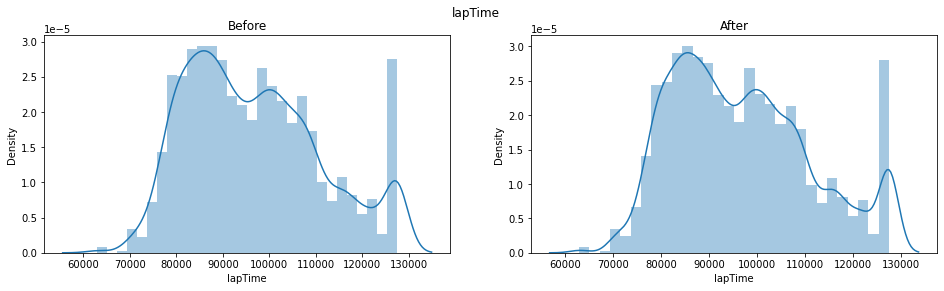

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


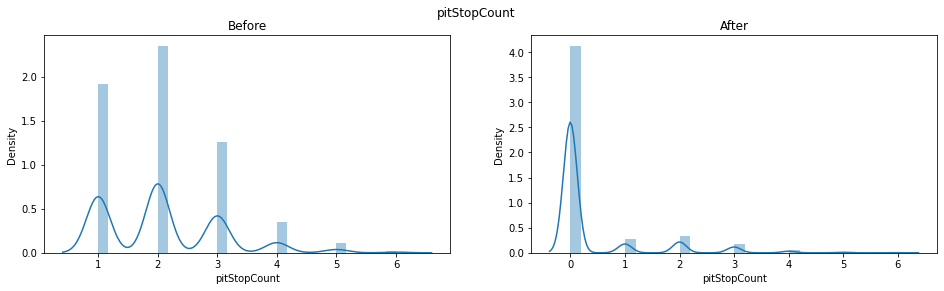

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


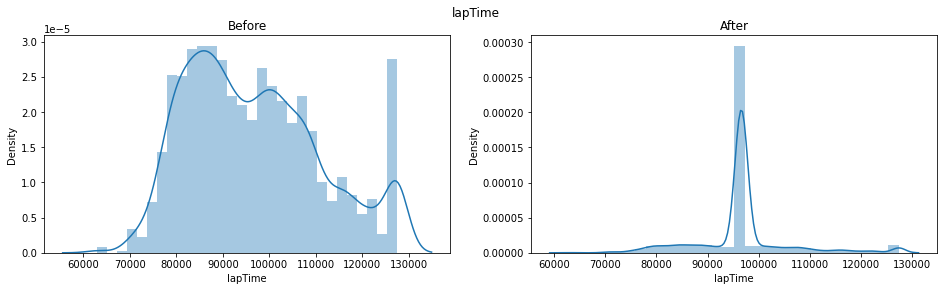

In [86]:
if load_visualisations:

    before_after_histogram(X_train_before,X_train,'lapTime')
    before_after_histogram(X_train_before,X_train,'pitStopCount')

    if run_K_Cluster:
        # visualise
        before_after_histogram(X_train_before_imputer,X_train_after_KNNImputer,'lapTime')

In [87]:
X_train['pitStopCount'].value_counts(ascending=True)

6.0       12
5.0       57
4.0      175
3.0      638
1.0      970
2.0     1192
0.0    14384
Name: pitStopCount, dtype: int64

In [88]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

driverId           0
constructorId      0
grid               0
positionText       0
nationality        0
raceYear           0
circuitId          0
driverAge          0
alt                0
country            0
seasonalPodium     0
lapTime            0
pitStopCount       0
lapTime_na         0
pitStopCount_na    0
dtype: int64
driverId           0
constructorId      0
grid               0
positionText       0
nationality        0
raceYear           0
circuitId          0
driverAge          0
alt                0
country            0
seasonalPodium     0
lapTime            0
pitStopCount       0
lapTime_na         0
pitStopCount_na    0
dtype: int64


# 7 Transformation <a id = "7"></a>

## 7.1 Initalizing Transformers <a id = "7.1"></a>

In [89]:
variable = ['lapTime']

In [90]:
# initialize the transformer
# YeoJohnson
ygt = YeoJohnsonTransformer(variables=variable)
# fit transformer to data set
ygt.fit(X_train)
# transform variables within our data set
X_train_ygt = ygt.transform(X_train)
X_test_ygt = ygt.transform(X_test)

# Log
lt = LogTransformer(variables=variable)
# fit transformer to data set
lt.fit(X_train)
# transform variables within our data set
X_train_lt = lt.transform(X_train)
X_test_lt = lt.transform(X_test)

# Reciprocal
rt = ReciprocalTransformer(variables=variable)
# fit transformer to data set
rt.fit(X_train)
# transform variables within our data set
X_train_rt = rt.transform(X_train)
X_test_rt = rt.transform(X_test)

# Square-cube-root
sqrtt = PowerTransformer(variables=variable, exp = 1/3)
# fit transformer to data set
sqrtt.fit(X_train)
# transform variables within our data set
X_train_sqrtt = sqrtt.transform(X_train)
X_test_sqrtt = sqrtt.transform(X_test)

# Power
pt = PowerTransformer(variables=variable, exp = 0.59)
# fit transformer to data set
pt.fit(X_train)
# transform variables within our data set
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

# Box Cox
bct = BoxCoxTransformer(variables=variable)
# fit transformer to data set
bct.fit(X_train)
# transform variables within our data set
X_train_bct = bct.transform(X_train)
X_test_bct = bct.transform(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1557: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(trans.var(axis=0))
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2216: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2217: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
c:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:2214: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


## 7.2 Visualise Changes <a id = "7.2"></a>

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


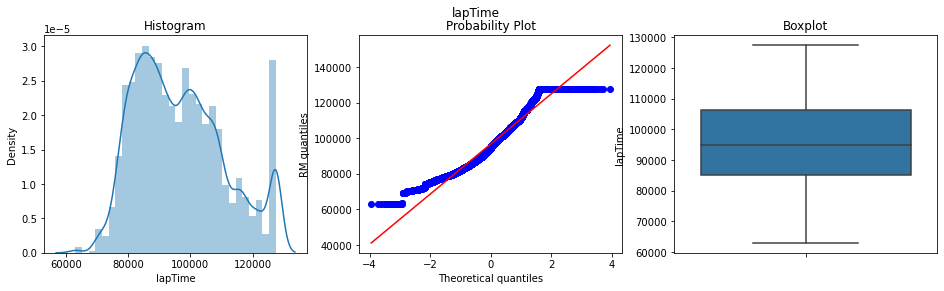

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


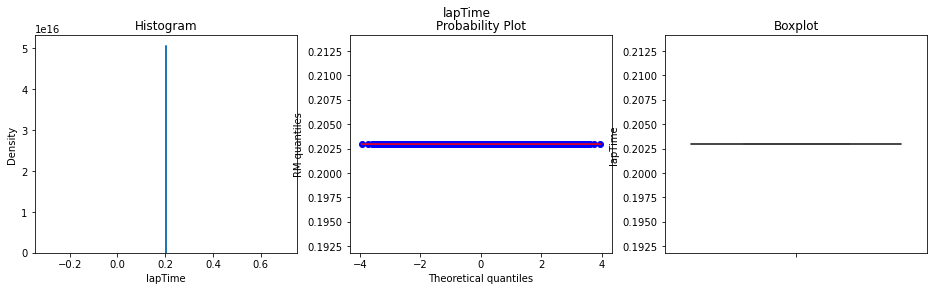

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


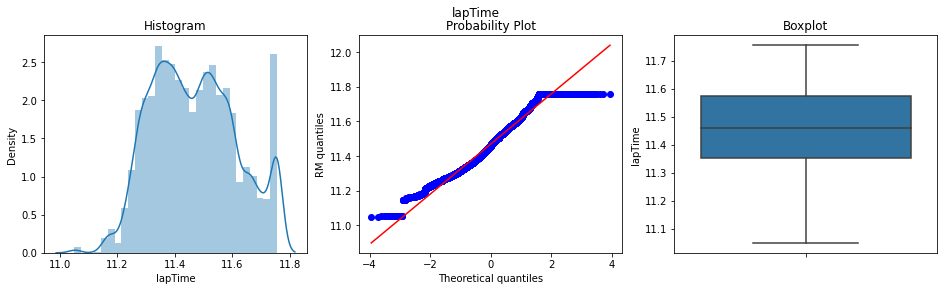

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


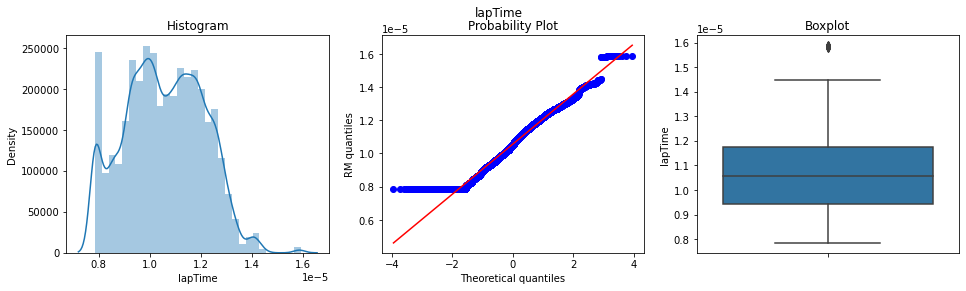

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


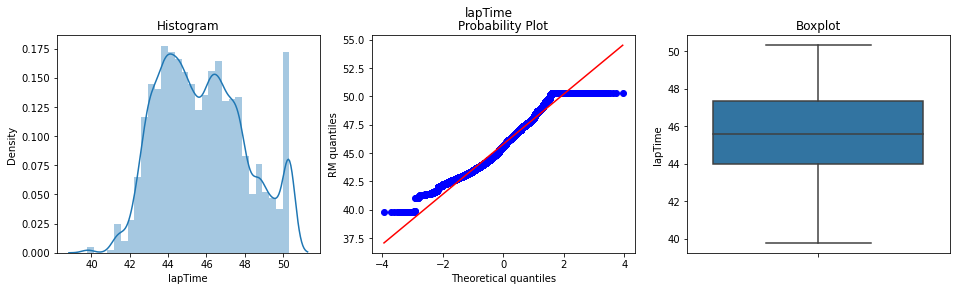

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


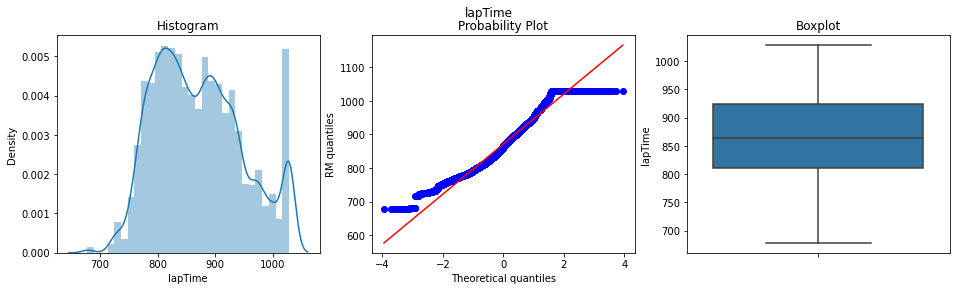

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


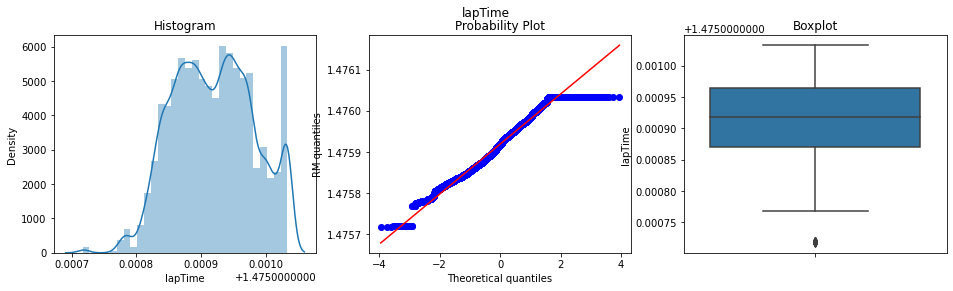

In [91]:
if load_visualisations:
    # use diagnostic plot function to evaluate transformation

    diagnostic_plots(X_train, 'lapTime')

    diagnostic_plots(X_train_ygt, 'lapTime')
    diagnostic_plots(X_train_lt, 'lapTime')
    diagnostic_plots(X_train_rt, 'lapTime')
    diagnostic_plots(X_train_sqrtt, 'lapTime')
    diagnostic_plots(X_train_pt, 'lapTime')
    diagnostic_plots(X_train_bct, 'lapTime')

In [92]:
if transform_method==0:
    pass

elif transform_method==1:
    X_train = X_train_ygt
    X_test = X_test_ygt

elif transform_method==2:
    X_train = X_train_lt
    X_test = X_test_lt

elif transform_method==3:
    X_train = X_train_rt
    X_test = X_test_rt

elif transform_method==4:
    X_train = X_train_sqrtt
    X_test = X_test_sqrtt

elif transform_method==5:
    X_train = X_train_pt
    X_test = X_test_pt

elif transform_method==6:
    X_train = X_train_bct
    X_test = X_test_bct

# 8 Categorial Encoding <a id = "8"></a>

## 8.1 Identify Categoricals <a id = "8.1"></a>

In [93]:
X_train

,driverId,constructorId,grid,positionText,nationality,raceYear,circuitId,driverAge,alt,country,seasonalPodium,lapTime,pitStopCount,lapTime_na,pitStopCount_na
22071,825,1,17.0,Active,Danish,2015,1,23,10,Australia,0.0,86219.0,0.0,1,1
22906,841,15,16.0,Active,Italian,2017,1,24,10,Australia,0.0,92441.0,1.0,0,0
23314,828,15,17.0,Active,Swedish,2018,1,28,10,Australia,0.0,95019.0,0.0,0,1
22056,3,131,2.0,Active,German,2015,1,30,10,Australia,1.0,95093.0,1.0,0,0
1107,35,15,4.0,Active,Canadian,2005,1,34,10,Australia,0.0,90668.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24878,854,210,19.0,Active,German,2021,77,22,15,Saudi Arabia,0.0,98543.0,0.0,0,1
24872,852,213,8.0,Active,Japanese,2021,77,21,15,Saudi Arabia,0.0,127451.8,3.0,0,0
24871,4,214,13.0,Active,Spanish,2021,77,40,15,Saudi Arabia,0.0,127451.8,4.0,0,0
24875,815,9,5.0,Active,Mexican,2021,77,31,15,Saudi Arabia,1.0,127451.8,2.0,0,0


In [94]:
X_train_Vars_Categorial = X_train[['driverId','constructorId','positionText','nationality','circuitId','country']]
X_train_Vars_Categorial

,driverId,constructorId,positionText,nationality,circuitId,country
22071,825,1,Active,Danish,1,Australia
22906,841,15,Active,Italian,1,Australia
23314,828,15,Active,Swedish,1,Australia
22056,3,131,Active,German,1,Australia
1107,35,15,Active,Canadian,1,Australia
...,...,...,...,...,...,...
24878,854,210,Active,German,77,Saudi Arabia
24872,852,213,Active,Japanese,77,Saudi Arabia
24871,4,214,Active,Spanish,77,Saudi Arabia
24875,815,9,Active,Mexican,77,Saudi Arabia


In [95]:
X_train_Vars_Categorial.nunique()

driverId         779
constructorId    196
positionText       3
nationality       41
circuitId         75
country           33
dtype: int64

## 8.2 Encoding <a id = "8.2"></a>

### 8.2.1 One-Hot Encoding <a id = "8.2..1"></a>

In [96]:
# make a list with the categorical variables

vars_categorical_onehot = ['positionText','nationality','country']

In [97]:
# create temp copy of df without vars categorical one hot
X_train_temp = X_train.copy()
X_test_temp = X_test.copy()

X_train_temp.drop(columns=vars_categorical_onehot, inplace=True)
X_test_temp.drop(columns=vars_categorical_onehot, inplace=True)
X_train_temp.head()

,driverId,constructorId,grid,raceYear,circuitId,driverAge,alt,seasonalPodium,lapTime,pitStopCount,lapTime_na,pitStopCount_na
22071,825,1,17.0,2015,1,23,10,0.0,86219.0,0.0,1,1
22906,841,15,16.0,2017,1,24,10,0.0,92441.0,1.0,0,0
23314,828,15,17.0,2018,1,28,10,0.0,95019.0,0.0,0,1
22056,3,131,2.0,2015,1,30,10,1.0,95093.0,1.0,0,0
1107,35,15,4.0,2005,1,34,10,0.0,90668.0,0.0,0,1


In [98]:
# now let's encode all cateogrical variables together: train set

X_train_enc = pd.get_dummies(X_train[vars_categorical_onehot])
X_test_enc = pd.get_dummies(X_test[vars_categorical_onehot])

In [99]:
# merge onehot encoded X_train_enc with X_train_temp to recreate original dataframe
X_train_one_hot = pd.concat([X_train_enc, X_train_temp], axis=1).reindex(X_train_temp.index)
X_test_one_hot = pd.concat([X_test_enc, X_test_temp], axis=1).reindex(X_test_temp.index)

In [100]:
print(X_train_one_hot.shape)
print(X_test_one_hot.shape)
print(X_train.shape)
print(X_test.shape)

(17428, 89)
(7470, 87)
(17428, 15)
(7470, 15)


In [101]:
# get missing columns in x_test
x_train_one_hot_col = X_train_one_hot.columns.to_list()
x_test_one_hot_col = X_test_one_hot.columns.to_list()
col_diff = list(set(x_train_one_hot_col) - set(x_test_one_hot_col))
print(col_diff)

['nationality_Uruguayan', 'nationality_American-Italian']


In [102]:
for col in col_diff:
    print('Rows Lost: ' + str(X_train_one_hot[X_train_one_hot[col]==1].shape[0]))

Rows Lost: 7
Rows Lost: 2


In [103]:
X_train_one_hot.drop(columns=col_diff,inplace=True)

In [104]:
X_train = X_train_one_hot
X_test = X_test_one_hot

In [105]:
X_train.columns

Index(['positionText_Active', 'positionText_N', 'positionText_Unwinnable',
       'nationality_American', 'nationality_Argentine',
       'nationality_Argentine-Italian', 'nationality_Australian',
       'nationality_Austrian', 'nationality_Belgian', 'nationality_Brazilian',
       'nationality_British', 'nationality_Canadian', 'nationality_Chilean',
       'nationality_Colombian', 'nationality_Czech', 'nationality_Danish',
       'nationality_Dutch', 'nationality_East German', 'nationality_Finnish',
       'nationality_French', 'nationality_German', 'nationality_Hungarian',
       'nationality_Indian', 'nationality_Indonesian', 'nationality_Irish',
       'nationality_Italian', 'nationality_Japanese',
       'nationality_Liechtensteiner', 'nationality_Malaysian',
       'nationality_Mexican', 'nationality_Monegasque',
       'nationality_New Zealander', 'nationality_Polish',
       'nationality_Portuguese', 'nationality_Rhodesian',
       'nationality_Russian', 'nationality_South Afri

In [106]:
X_train

,positionText_Active,positionText_N,positionText_Unwinnable,nationality_American,nationality_Argentine,nationality_Argentine-Italian,nationality_Australian,nationality_Austrian,nationality_Belgian,nationality_Brazilian,...,grid,raceYear,circuitId,driverAge,alt,seasonalPodium,lapTime,pitStopCount,lapTime_na,pitStopCount_na
22071,1,0,0,0,0,0,0,0,0,0,...,17.0,2015,1,23,10,0.0,86219.0,0.0,1,1
22906,1,0,0,0,0,0,0,0,0,0,...,16.0,2017,1,24,10,0.0,92441.0,1.0,0,0
23314,1,0,0,0,0,0,0,0,0,0,...,17.0,2018,1,28,10,0.0,95019.0,0.0,0,1
22056,1,0,0,0,0,0,0,0,0,0,...,2.0,2015,1,30,10,1.0,95093.0,1.0,0,0
1107,1,0,0,0,0,0,0,0,0,0,...,4.0,2005,1,34,10,0.0,90668.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24878,1,0,0,0,0,0,0,0,0,0,...,19.0,2021,77,22,15,0.0,98543.0,0.0,0,1
24872,1,0,0,0,0,0,0,0,0,0,...,8.0,2021,77,21,15,0.0,127451.8,3.0,0,0
24871,1,0,0,0,0,0,0,0,0,0,...,13.0,2021,77,40,15,0.0,127451.8,4.0,0,0
24875,1,0,0,0,0,0,0,0,0,0,...,5.0,2021,77,31,15,1.0,127451.8,2.0,0,0


### 8.2.2 Frequency Encoding <a id = "8.2.2"></a>

In [107]:
# make a list with the categorical variables

vars_categorical_frequency = ['driverId','constructorId','circuitId']

In [108]:
# create a copy for this section and to deal with NaNs later
X_test_frequency_subset = X_test.copy()
X_train_frequency = X_train.copy()
X_test_frequency = X_test.copy()

In [109]:
#define encoding and maping functions
def count_mappings(df, variable):
    return df[variable].value_counts().to_dict()

def encode(train, test, variable, mapping):
    train[variable] = train[variable].map(mapping)
    test[variable] = test[variable].map(mapping)

In [110]:
# encode multiple categorical variables with the functions above
for variable in vars_categorical_frequency:
    mappings = count_mappings(X_train_frequency, variable)
    encode(X_train_frequency, X_test_frequency, variable, mappings)

In [111]:
# nulls from rows that exist only in X_test
X_test_frequency.isnull().sum()

positionText_Active        0
positionText_N             0
positionText_Unwinnable    0
nationality_American       0
nationality_Argentine      0
                          ..
seasonalPodium             0
lapTime                    0
pitStopCount               0
lapTime_na                 0
pitStopCount_na            0
Length: 87, dtype: int64

In [112]:
# find index of nulls
indices = X_test_frequency['driverId'].index[X_test_frequency['driverId'].apply(np.isnan)]
indices_driverId = indices.tolist()
print(indices_driverId)
print(len(indices_driverId))

# perform the same encoding and mapping process but for only these values in X_test_Check using the indexes in the already encoded X_test
mapping = X_test_frequency_subset.loc[indices_driverId]['driverId'].value_counts().to_dict()
X_test_frequency_subset.replace(mapping, inplace=True)

[19589, 17832, 18038, 18530, 18840, 19563, 19073, 19480, 16615, 19270, 13049, 21911, 19230, 19649, 19160, 19527, 18724, 12721, 17570, 14425, 19692, 17569, 19372, 17328, 13676, 13243, 18301, 18966, 18759, 18098, 19594, 19413, 19396, 18763, 18464, 17646, 18969, 19412, 18962, 18975, 18770, 19591, 18645, 19297, 19100, 19299, 19306, 18542, 17284, 6525, 14376, 17600, 17602, 18591, 6557, 16146, 17150, 16342, 17147, 15258, 16027, 17341, 13652, 15709, 17348, 17125, 17579, 15400, 16281, 16284, 19250, 18506, 19455, 17465, 16537, 18697, 17919, 18005, 18008, 18237]
80


In [113]:
# find index of nulls
indices = X_test_frequency['constructorId'].index[X_test_frequency['constructorId'].apply(np.isnan)]
indices_constructorId = indices.tolist()
print(indices_constructorId)
print(len(indices_constructorId))

# perform the same encoding and mapping process but for only these values in X_test_Check using the indexes in the already encoded X_test
mapping = X_test_frequency_subset.loc[indices_constructorId]['constructorId'].value_counts().to_dict()
X_test_frequency_subset.replace(mapping, inplace=True)

[16240, 13179, 17096, 19372, 19198, 19413, 19398, 17867, 18975, 19098, 18869, 16537, 17934, 18000]
14


In [114]:
# get combined list without duplicates of indexes
index_of_nans = list(set(indices_driverId + indices_constructorId))
print(index_of_nans)
print(len(index_of_nans))

[17934, 18962, 18966, 19480, 18969, 18975, 18464, 14376, 15400, 17465, 19527, 18506, 18000, 18005, 18008, 14425, 19455, 18530, 19563, 18542, 18038, 19073, 19589, 19591, 19594, 16537, 19098, 16027, 19100, 18591, 17569, 17570, 17579, 18098, 17600, 19649, 17602, 17096, 18645, 19160, 17125, 16615, 19692, 17646, 13049, 17147, 17150, 19198, 18697, 16146, 19230, 18724, 19250, 18237, 19270, 18759, 18763, 18770, 13652, 15709, 19297, 19299, 19306, 13676, 16240, 13179, 6525, 18301, 17284, 21911, 18840, 16281, 15258, 16284, 6557, 17832, 19372, 17328, 12721, 18869, 13243, 17341, 19396, 17348, 19398, 17867, 19412, 19413, 16342, 17919]
90


In [115]:
# obtain a dataframe of just row index and item_identifier of the NaNs
X_test_frequency_subset = X_test_frequency_subset.loc[index_of_nans][['driverId','constructorId']]
X_test_frequency_subset

,driverId,constructorId
17934,387,1
18962,2,129
18966,2,113
19480,1,105
18969,2,113
...,...,...
17867,565,1
19412,2,113
19413,1,1
16342,2,176


In [116]:
# check shape
X_test_frequency.shape

(7470, 87)

In [117]:
# replace the NaN item_identity of X_test by pasting over/ updating it with the values in X_test_Check2
X_test_frequency.update(X_test_frequency_subset)

In [118]:
# check shape for no change
X_test_frequency.shape

(7470, 87)

In [119]:
# check for NaNs
X_test_frequency.isnull().sum()

positionText_Active        0
positionText_N             0
positionText_Unwinnable    0
nationality_American       0
nationality_Argentine      0
                          ..
seasonalPodium             0
lapTime                    0
pitStopCount               0
lapTime_na                 0
pitStopCount_na            0
Length: 87, dtype: int64

In [120]:
X_train = X_train_frequency
X_test = X_test_frequency

In [121]:
X_train

,positionText_Active,positionText_N,positionText_Unwinnable,nationality_American,nationality_Argentine,nationality_Argentine-Italian,nationality_Australian,nationality_Austrian,nationality_Belgian,nationality_Brazilian,...,grid,raceYear,circuitId,driverAge,alt,seasonalPodium,lapTime,pitStopCount,lapTime_na,pitStopCount_na
22071,1,0,0,0,0,0,0,0,0,0,...,17.0,2015,268,23,10,0.0,86219.0,0.0,1,1
22906,1,0,0,0,0,0,0,0,0,0,...,16.0,2017,268,24,10,0.0,92441.0,1.0,0,0
23314,1,0,0,0,0,0,0,0,0,0,...,17.0,2018,268,28,10,0.0,95019.0,0.0,0,1
22056,1,0,0,0,0,0,0,0,0,0,...,2.0,2015,268,30,10,1.0,95093.0,1.0,0,0
1107,1,0,0,0,0,0,0,0,0,0,...,4.0,2005,268,34,10,0.0,90668.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24878,1,0,0,0,0,0,0,0,0,0,...,19.0,2021,14,22,15,0.0,98543.0,0.0,0,1
24872,1,0,0,0,0,0,0,0,0,0,...,8.0,2021,14,21,15,0.0,127451.8,3.0,0,0
24871,1,0,0,0,0,0,0,0,0,0,...,13.0,2021,14,40,15,0.0,127451.8,4.0,0,0
24875,1,0,0,0,0,0,0,0,0,0,...,5.0,2021,14,31,15,1.0,127451.8,2.0,0,0


In [122]:
X_train.columns

Index(['positionText_Active', 'positionText_N', 'positionText_Unwinnable',
       'nationality_American', 'nationality_Argentine',
       'nationality_Argentine-Italian', 'nationality_Australian',
       'nationality_Austrian', 'nationality_Belgian', 'nationality_Brazilian',
       'nationality_British', 'nationality_Canadian', 'nationality_Chilean',
       'nationality_Colombian', 'nationality_Czech', 'nationality_Danish',
       'nationality_Dutch', 'nationality_East German', 'nationality_Finnish',
       'nationality_French', 'nationality_German', 'nationality_Hungarian',
       'nationality_Indian', 'nationality_Indonesian', 'nationality_Irish',
       'nationality_Italian', 'nationality_Japanese',
       'nationality_Liechtensteiner', 'nationality_Malaysian',
       'nationality_Mexican', 'nationality_Monegasque',
       'nationality_New Zealander', 'nationality_Polish',
       'nationality_Portuguese', 'nationality_Rhodesian',
       'nationality_Russian', 'nationality_South Afri

# 9 Variable Discretization <a id = "9"></a>

## 9.1 Initalize Variables <a id = "9.1"></a>

In [123]:
# print variable types
X_train.dtypes

positionText_Active          uint8
positionText_N               uint8
positionText_Unwinnable      uint8
nationality_American         uint8
nationality_Argentine        uint8
                            ...   
seasonalPodium             float64
lapTime                    float64
pitStopCount               float64
lapTime_na                   int32
pitStopCount_na              int32
Length: 87, dtype: object

In [124]:
variables = ['lapTime']
binsize = 10
X_train_Binnable = X_train[variables]

## 9.2 Equal Width/Frequency Discretiser <a id = "9.2"></a>

In [125]:
#Equal Width
Widthdisc = EqualWidthDiscretiser(bins=binsize, variables = variables)

Widthdisc.fit(X_train)

# transform train and test sets
X_train_Widthdisc = Widthdisc.transform(X_train)
X_test_Widthdisc = Widthdisc.transform(X_test)

#Equal Frequency
Freqdisc = EqualFrequencyDiscretiser(variables = variables)

Freqdisc.fit(X_train)

# transform train and test sets
X_train_Freqdisc = Freqdisc.transform(X_train)
X_test_Freqdisc = Freqdisc.transform(X_test)

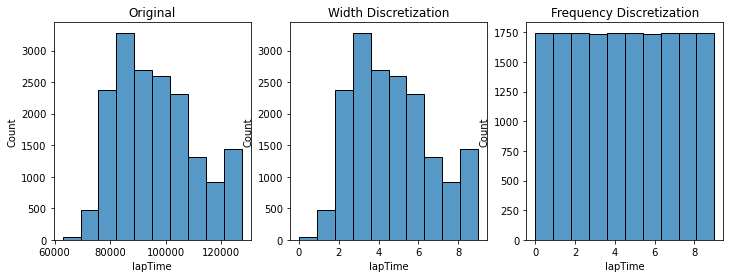

In [126]:
if load_visualisations:
    # to create histogram of distribution

    # define figure size
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    sns.histplot(data=X_train, x=variables[0], bins=binsize)
    plt.title('Original')

    plt.subplot(1, 3, 2)
    sns.histplot(data=X_train_Widthdisc, x=variables[0], bins=binsize)
    plt.title('Width Discretization')

    plt.subplot(1, 3, 3)
    sns.histplot(data=X_train_Freqdisc, x=variables[0], bins=binsize)
    plt.title('Frequency Discretization')


    plt.show()

In [127]:
if discretiser_method==0:
    pass

elif discretiser_method==1:
    X_train = X_train_Widthdisc
    X_test = X_test_Widthdisc
    
elif discretiser_method==2:
    X_train = X_train_Freqdisc
    X_test = X_test_Freqdisc

# 10 Scaling <a id = "10"></a>

## 10.1 Initalize Scalers <a id = "10.1"></a>

In [128]:
X_train_no_scaling = X_train.copy()
X_test_no_scaling = X_test.copy()

### 10.1.1 Standard Scaler <a id = "10.1.1"></a>

In [129]:
# standardisation: with the StandardScaler from sklearn

# set up the  Standard Scaler 
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's transform the returned NumPy arrays to dataframes
X_train_std = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### 10.1.2 MinMax Scaler <a id = "10.1.2"></a>

In [130]:
# set up the  MinMax Scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's transform the returned NumPy arrays to dataframes
X_train_minmax = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_minmax = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### 10.1.3 Robust Scaler <a id = "10.1.3"></a>

In [131]:
# set up the Robust Scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's transform the returned NumPy arrays to dataframes
X_train_robust = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_robust = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### 10.1.4 Maximum Absoulute Scaler <a id = "10.1.4"></a>

In [132]:
# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the MaxAbsScaler normally
scaler_maxabs = MaxAbsScaler()

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_maxabs.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_maxabs.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_maxabs.transform(scaler_mean.transform(X_test))

# let's transform the returned NumPy arrays to dataframes
X_train_MaxAbs = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_MaxAbs = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### 10.1.5 Mean Normalisation Scaler <a id = "10.1.5"></a>

In [133]:
means = X_train.mean(axis=0)
ranges = X_train.max(axis=0)-X_train.min(axis=0)
# now we are ready to perform mean normalization:
X_train_mean = (X_train-means)/ranges
X_test_mean = (X_test-means)/ranges

## 10.2 Visualise Scalers <a id = "10.2"></a>

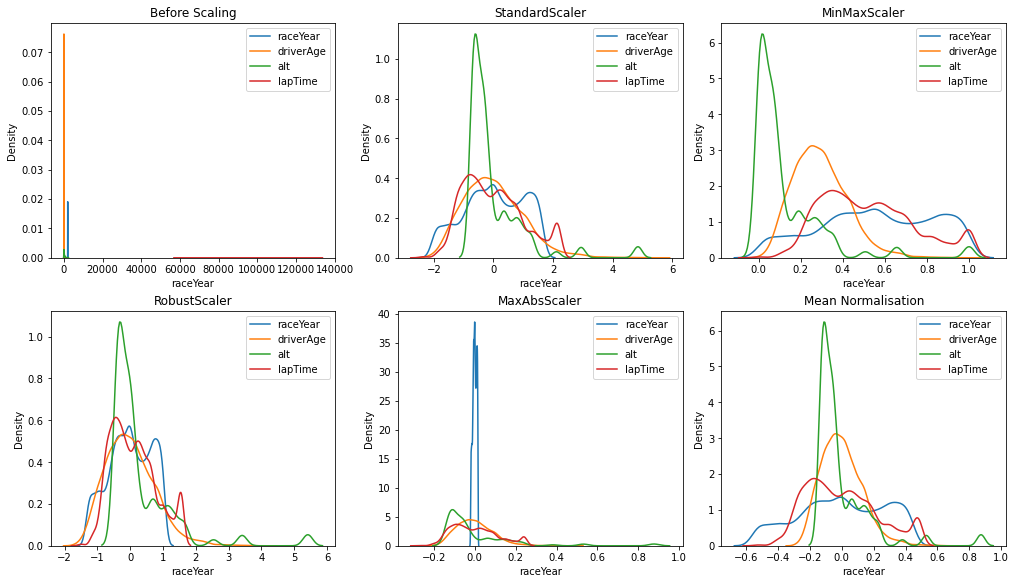

In [134]:
if load_visualisations:

    # Create a figure to be used as a dashboard
    fig = plt.figure(figsize=(14,8), constrained_layout=True)

    # Use GridSpec to determine the dimensions of the dashboard
    gs = GridSpec(nrows=2, ncols=3, figure=fig)

    # Define subplots and their corresponding positions
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[0,2])
    ax4 = fig.add_subplot(gs[1,0])
    ax5 = fig.add_subplot(gs[1,1])
    ax6 = fig.add_subplot(gs[1,2])

    axisList = [ax1,ax2,ax3,ax4,ax5,ax6]
    titleList = ['Before Scaling','StandardScaler','MinMaxScaler','RobustScaler','MaxAbsScaler','Mean Normalisation']
    dataframeList = [X_train,X_train_std,X_train_minmax,X_train_robust,X_train_MaxAbs,X_train_mean]

    for i in range(len(axisList)):
        axisList[i].set_title(titleList[i])
        sns.kdeplot(dataframeList[i]['raceYear'], ax=axisList[i], label ='raceYear')
        sns.kdeplot(dataframeList[i]['driverAge'], ax=axisList[i], label ='driverAge')
        sns.kdeplot(dataframeList[i]['alt'], ax=axisList[i], label ='alt')
        sns.kdeplot(dataframeList[i]['lapTime'], ax=axisList[i], label ='lapTime')
        axisList[i].legend()

    plt.show()

In [135]:
if scaler_method==0:
    pass

elif scaler_method==1:
    X_train = X_train_std
    X_test = X_test_std
    
elif scaler_method==2:
    X_train = X_train_minmax
    X_test = X_test_minmax

elif scaler_method==3:
    X_train = X_train_robust
    X_test = X_test_robust

elif scaler_method==4:
    X_train = X_train_MaxAbs
    X_test = X_test_MaxAbs

elif scaler_method==5:
    X_train = X_train_mean
    X_test = X_test_mean

# 11 Machine Learning Modelling <a id = "11"></a>

## 11.1 Naive BaseLine <a id = "11.1"></a>

In [136]:
data = df_naive_baseline
X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(data.drop('podium', axis=1),
                                                    data['podium'], 
                                                    test_size=0.3, 
                                                    random_state=1)#9 HAS NO ISSUES WITH ONE HOT

X_train_naive.shape, X_test_naive.shape, y_train_naive.shape, y_test_naive.shape

((17428, 13), (7470, 13), (17428,), (7470,))

### 11.1.1 Defining Modal label <a id = "11.1.1"></a>

In [137]:
y_labels = ['podium']

In [138]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train_naive))

modal_class_label = stats.mode(y_train_naive)[0]

print(f"The modal class label is {int(modal_class_label)}, \
and the accompanying string value of this label is {y_labels}.")

ModeResult(mode=array([0]), count=array([13753]))
The modal class label is 0, and the accompanying string value of this label is ['podium'].


In [139]:
y_train_preds_naive = [int(modal_class_label) for row in X_train_naive.iloc[:,0]]
y_train_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [140]:
y_test_preds_naive = [int(modal_class_label) for row in X_test_naive.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

### 11.1.2 Prediction <a id = "11.1.2"></a>

In [141]:
# scoring accuracy of model
# note that other metrics exist, eg. AUC-ROC, Confusion Matrix-Based Metrics, but these matter more for imbalanced data
# where classes don't share same representation, eg. class 0 is 80%, class 1 is 10%, class 2 is 10%
# and are advanced Machine Learning topics

from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train_naive
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test_naive
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 78.91%.
The Naive Baseline Model's accuracy on test data is 78.92%.


## 11.2 Decision Tree <a id = "11.2"></a>

### 11.2.1 Set Up <a id = "11.2.1"></a>

In [142]:
# X_train_no_scaling.drop(columns=['driverId','constructorId','circuitId'],inplace=True)
# X_test_no_scaling.drop(columns=['driverId','constructorId','circuitId'],inplace=True)

In [143]:
X_train_no_scaling.shape, X_test_no_scaling.shape

((17428, 87), (7470, 87))

In [144]:
X_train_no_scaling

,positionText_Active,positionText_N,positionText_Unwinnable,nationality_American,nationality_Argentine,nationality_Argentine-Italian,nationality_Australian,nationality_Austrian,nationality_Belgian,nationality_Brazilian,...,grid,raceYear,circuitId,driverAge,alt,seasonalPodium,lapTime,pitStopCount,lapTime_na,pitStopCount_na
22071,1,0,0,0,0,0,0,0,0,0,...,17.0,2015,268,23,10,0.0,86219.0,0.0,1,1
22906,1,0,0,0,0,0,0,0,0,0,...,16.0,2017,268,24,10,0.0,92441.0,1.0,0,0
23314,1,0,0,0,0,0,0,0,0,0,...,17.0,2018,268,28,10,0.0,95019.0,0.0,0,1
22056,1,0,0,0,0,0,0,0,0,0,...,2.0,2015,268,30,10,1.0,95093.0,1.0,0,0
1107,1,0,0,0,0,0,0,0,0,0,...,4.0,2005,268,34,10,0.0,90668.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24878,1,0,0,0,0,0,0,0,0,0,...,19.0,2021,14,22,15,0.0,98543.0,0.0,0,1
24872,1,0,0,0,0,0,0,0,0,0,...,8.0,2021,14,21,15,0.0,127451.8,3.0,0,0
24871,1,0,0,0,0,0,0,0,0,0,...,13.0,2021,14,40,15,0.0,127451.8,4.0,0,0
24875,1,0,0,0,0,0,0,0,0,0,...,5.0,2021,14,31,15,1.0,127451.8,2.0,0,0


In [145]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train_no_scaling, y_train)

DecisionTreeClassifier(random_state=1)

In [146]:
y_train_preds_dtree = dtree.predict(X_train_no_scaling)
y_test_preds_dtree = dtree.predict(X_test_no_scaling)

### 11.2.2 Prediction <a id = "11.2.2"></a>

In [147]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_dtree

train_accuracy_dtree = accuracy_score(y_true, y_pred) * 100
print(f"The DTree Model's accuracy on train data is {train_accuracy_dtree:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_dtree

test_accuracy_dtree = accuracy_score(y_true, y_pred) * 100
print(f"The DTRee Model's accuracy on test data is {test_accuracy_dtree:.2f}%.")

The DTree Model's accuracy on train data is 100.00%.
The DTRee Model's accuracy on test data is 65.74%.


## 11.3 Logistic Regression <a id = "11.3"></a>

### 11.3.1 Set Up <a id = "11.3.1"></a>

In [148]:
X_train.columns

Index(['positionText_Active', 'positionText_N', 'positionText_Unwinnable',
       'nationality_American', 'nationality_Argentine',
       'nationality_Argentine-Italian', 'nationality_Australian',
       'nationality_Austrian', 'nationality_Belgian', 'nationality_Brazilian',
       'nationality_British', 'nationality_Canadian', 'nationality_Chilean',
       'nationality_Colombian', 'nationality_Czech', 'nationality_Danish',
       'nationality_Dutch', 'nationality_East German', 'nationality_Finnish',
       'nationality_French', 'nationality_German', 'nationality_Hungarian',
       'nationality_Indian', 'nationality_Indonesian', 'nationality_Irish',
       'nationality_Italian', 'nationality_Japanese',
       'nationality_Liechtensteiner', 'nationality_Malaysian',
       'nationality_Mexican', 'nationality_Monegasque',
       'nationality_New Zealander', 'nationality_Polish',
       'nationality_Portuguese', 'nationality_Rhodesian',
       'nationality_Russian', 'nationality_South Afri

In [149]:
# for seeing the influence of a variable on accuracy by dropping it
vars_droppable = ['pitStopCount','lapTime','lapTime_na','pitStopCount_na']
X_train.drop(columns=vars_droppable,inplace=True)
X_test.drop(columns=vars_droppable,inplace=True)

In [150]:
X_train.shape, X_test.shape

((17428, 83), (7470, 83))

In [151]:
X_train

,positionText_Active,positionText_N,positionText_Unwinnable,nationality_American,nationality_Argentine,nationality_Argentine-Italian,nationality_Australian,nationality_Austrian,nationality_Belgian,nationality_Brazilian,...,country_UK,country_USA,driverId,constructorId,grid,raceYear,circuitId,driverAge,alt,seasonalPodium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.119565,1.759336,0.500000,0.833333,-0.530752,-1.000000,-0.373368,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.358696,0.300830,0.416667,0.900000,-0.530752,-0.857143,-0.373368,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.065217,0.300830,0.500000,0.933333,-0.530752,-0.285714,-0.373368,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.641304,-0.014523,-0.750000,0.833333,-0.530752,0.000000,-0.373368,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.250000,0.300830,-0.583333,0.500000,-0.530752,0.571429,-0.373368,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.619565,-0.435685,0.666667,1.033333,-1.109339,-1.142857,-0.360313,0.0
17424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.619565,-0.661826,-0.250000,1.033333,-1.109339,-1.285714,-0.360313,0.0
17425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.695652,-0.719917,0.166667,1.033333,-1.109339,1.428571,-0.360313,0.0
17426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.934783,0.143154,-0.500000,1.033333,-1.109339,0.142857,-0.360313,1.0


In [152]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear') # you can experiment with different combinations of multi_class and solver
# logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs') # good option for larger datasets, fails here
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [153]:
y_train_preds_logreg = logreg.predict(X_train)
y_test_preds_logreg = logreg.predict(X_test)

### 11.3.2 prediction <a id = "11.3.2"></a>

In [154]:
# train accuracy score
y_true = y_train
y_pred = y_train_preds_logreg

train_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on train data is {train_accuracy_logreg:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_logreg

test_accuracy_logreg = accuracy_score(y_true, y_pred) * 100
print(f"The LogReg Model's accuracy on test data is {test_accuracy_logreg:.2f}%.")

The LogReg Model's accuracy on train data is 78.91%.
The LogReg Model's accuracy on test data is 78.92%.


# Introduction <a id = "1"></a>

Formula 1 (F1) is a motorsport held around the world that consists of driving a predetermined number of laps around a circuit. There drivers and their teams will compete on a circuit, first on a qualifier round then the actual race. The winner is based on a driver's position when he completes all laps. The goal of this assignment is to build a model and predict an outcome of a race given the data before the race.

The chosen problem statement that will be answer from the model is 'Who will be in the top 5 positions of a race?'

# Problem Formulation <a id = "2"></a>

## How F1 Works <a id = "2.1"></a>

The structure of how F1 is played and competed in is as follows, a driver will play for a constructor (team) for at least one season. During the **season** , several matches will be played, each match being held in a different circuit (track). During a **match** , the driver will first compete in a **qualifying** race, where their time in the qualifier determines their start position during the actual race.

The actual **race** will then occur on the next day, after the qualifiers, wherein all qualified drivers will compete, and only the top 3 drivers will obtain a podium position. When the season has concluded, the top 3 drivers with the most points, which are mainly earned based on the position during the race, will also receive another podium position.

## Problem Identification<a id = "2.2"></a>

This means that a driver who does not receive a podium position for one race, can do so for another, and subsequently be a top 3 driver for the season. The driver may also switch teams or fail to qualify for a race.

While the data dates back to 1950, resulting in a large wealth of data, the data for any one particular circuit, team, or driver is still limited. Thus, it is not possible to make any prediction pertaining to only one such category.

This means that the prediction chosen must be able to tap upon data that is old, and be broad enough so as to include as many circuits, teams and drivers. Furthermore, it must fit into either a classification or linear regression type model.

For linear regression models, the only continuous value of interest is the lap time. However, as circuits remain largely the same year over year, and only minor improvements are made in lap timings. The lap time will only change so much, as drivers are bound to the circuit layout and the speeds they can achieve before hitting the sound barrier. Until then, there will be little change and no reason to predict. Moreover, timing data is not fully populated, with many nulls for entire races.

For classification models, the main prediction is, which driver or constructor will achieve a position or range of positions.

An initial prediction and problem chosen was 'Given that a driver starts in the first grid position, what is the chance of him gaining a podium position?'. This is because the grid position is derived from the qualifier the day before, thus this information would be known before a race. The practical reason for this prediction would be because of the existence of F1 betting, and a category of which is which driver achieves a podium (or top 3) position. By subsetting the prediction to only the first grid position, or winning of the qualifiers, this increases the accuracy of the model significantly.

However, this results in an extremely low number of rows with True values, resulting in the model being overfitted. Thus, to achieve a reasonable ratio of True and False rows, the problem statement used will be **'Who will be in the top 5 positions of a race?'**. While this does not best serve a real-world scenario, it will be used to better suit the model. Moreover, the wrangling techniques used can be repurposed to predict the initial problem by altering the target variable. The data used in the prediction will still be taken in the perspective of before the race but after the qualifiers



# Data Wrangling on Multiple Tables<a id = "3"></a>

First, all tables will be loaded in, then have the value '\N', which represent nulls, into a NaN for easy identification. ($1.3) The main table used will be 'results\_mod\_data'. A target variable is created using the 'positionOrder', the final position of the driver at the end of the race. ($2.1)

Since doing data exploration on all and multiple tables is time and sanity inefficient, to data exploration will be done on the final dataframe instead. The criteria and way for identifying a column to be added to the main table is as follows:

- Can this data be obtained pre-race?
- Could this data be a factor in deciding the target variable?
- Does the data give more fidelity on other factors?
- Does the data help categorise the rows?

The tables which will be used are, results, driver, races, circuit, driver standings, lap time and pit stop. ($2.2)



## Results<a id = "3.1"></a>

($2.2.1)

The results table, which is the main starting table, is null free with the exception of 7 columns. The column 'position' is not needed as there are 2 other columns which provide that data. The rest of the columns are all related to time, which can be obtained from a different column. As such, these columns will simply be dropped.

'positionText' is the same as 'positonOrder', with the exception of containing data on the status. The data in 'positionText' can be categorised under, Active, Unwinnable and unknown. All positional and data that cannot be obtained before the start of the race will be treated as Active, while states such as 'Failed to qualify' will be placed under Unwinnable.



## Driver<a id = "3.2"></a>

($2.2.2)

The driver table will simply be used to obtain more data on a driver, namely their age and nationality. Their age will be obtained only after merging the next table, races.

It should be noted that as the data dates to 1950, nationalities such as 'East-Germany' that do not exist are in the data. Drivers with multiple nationalities are also present. While the most important part of the column 'nationality' is to categories drivers in the same nation as one, due to ambiguity of where to place these drivers, no editing will be done. Moreover, due to lack of a ISO3, placing drivers into their respective countries must be done manually.



## Races<a id = "3.3"></a>

($2.2.3)

The races table will be used to obtain the 'circuitId' and 'raceYear' of a rice. The date column can be seen to have null values, meaning it would not be possible to get the 'raceYear' from this column. However, it is possible to obtain only the year from the 'url' column.

By splitting and the 'url' and using the date column to fill in missing data not found in 'url', the 'raceYear' can be obtained.

Once the 'raceYear' has been obtained, it is only then possible to obtain the 'driverAge'. As it is more important to know if there is any influence on winning in correlation to 'driverAge' at the time of race than the current age. The 'dob' column can now be dropped



## Circuit<a id = "3.4"></a>

($2.2.4)

The circuit table will be used to obtain the altitude, and country of the circuit. Nulls exist in the circuit table in the 'alt' column, and as this is a one-to-many relationship between the circuit and main table, these nulls will be multiplied. The rows lost is acceptable at 20rows lost.

It is questionable as to whether adding these columns make sense as in real life, it is the layout and weather of a track that is most influential. The altitude is not normally cited as an important variable. Moreover, the connection between a driver and country to identify a possible home turf advantage is not possible due to the above-mentioned problems of changing countries and multiple nationalities. ($R RACES)



## Driver standings<a id = "3.5"></a>

($2.2.5)

The driver standings table will be used to obtain the current seasonal position of a driver. This will use the same condition as the target variable.

While this uses the same condition of the target variable, it is not giving the model the answer. Even if a driver can be in the top 5 position for the season, they may not necessarily be in the top 5 position every race or in the next particular race. This is because this seasonal position is based on points, which can be influenced by other factors such as fastest lap and race cancellations.



## Lap time & Pit Stops<a id = "3.6"></a>

($2.2.6) ($2.2.7)

The lap time table will give the average lap time for a given circuit and the pit stops table will give the count of pitstops taken during a race.

Both these tables are many to one type merges, thus will require their rows to be grouped by their 'raceId' and 'driverId' and the column to be added respectively aggregated.

Data from the lap time table is recorded the lap number and the total time in milliseconds at the time of completing that lap. This means that drivers which do not finish (DNF) will have a significantly lower mean lap time. This in theory should be counteracted by the fact that such rows will never have a true value in the target variable.

It should be noted that for both tables, there is a large number of nulls that must be imputed. Since a significant part of the data would have to be recreated, these columns, 'lapTime' and 'pitStopCount' should be considered to be dropped entirely if needed.



## Final DataFrame<a id = "3.7"></a>

The merged dataframe stands at 20 columns and ~25 000 rows. In actuality, 6 columns will be dropped as they are unobtainable before a race, and a further 3 columns are Ids, and 1 more for the target variable. Moreover, present only in 'lapTime' and 'pitStopCount', ~10 000 and ~14 000 rows are null respectively.

This leaves a final dataframe of 9 columns, and a total of ~25 000 rows, of which ~14 000 rows contain at least one null.

# Data Exploration<a id = "4"></a>

This section is dedicated to giving an overview of the final dataframe at hand and some interesting caveats that should be noted.

## Correlation<a id = "4.1"></a>

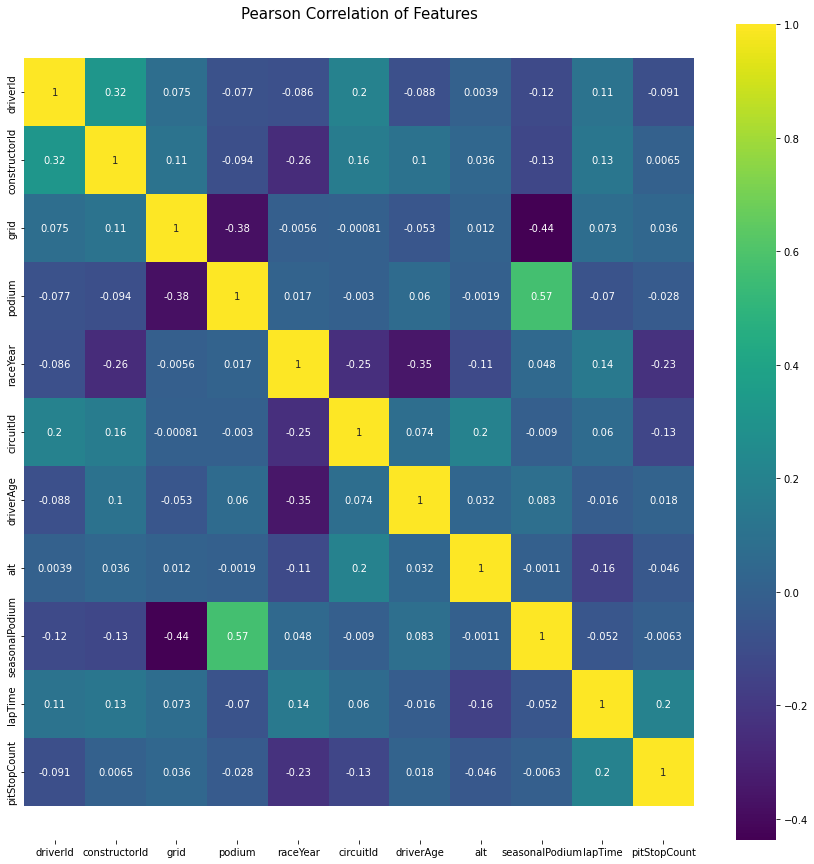

In [155]:
# heatmap visualization
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)
ax = sns.heatmap(df_naive_baseline.corr(), cmap=colormap, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

This heatmap shows the correlation between all variables. It can be seen that there is a strong positive relation between podium, the target variable, and 'seasonalPodium', whether or not a driver achieved the target variable for that season. This is particularly worrying as 'sealsonalPodium' is technically something that would not be available before a race, however the case can be made that regardless of whether a driver attains a 'seasonalPodium' position, does not necessarily relate to getting it in that particular race.

It can also be seen that there is a negative relation between podium and grid, as well as a positive relationship between 'lapTime' and 'pitStopCount'. This is simply an indicator that yes, starting further back and taking more time for pitStops has the intended effect, proving that the data does not have significant anomalies.

## Distribution<a id = "4.2"></a>

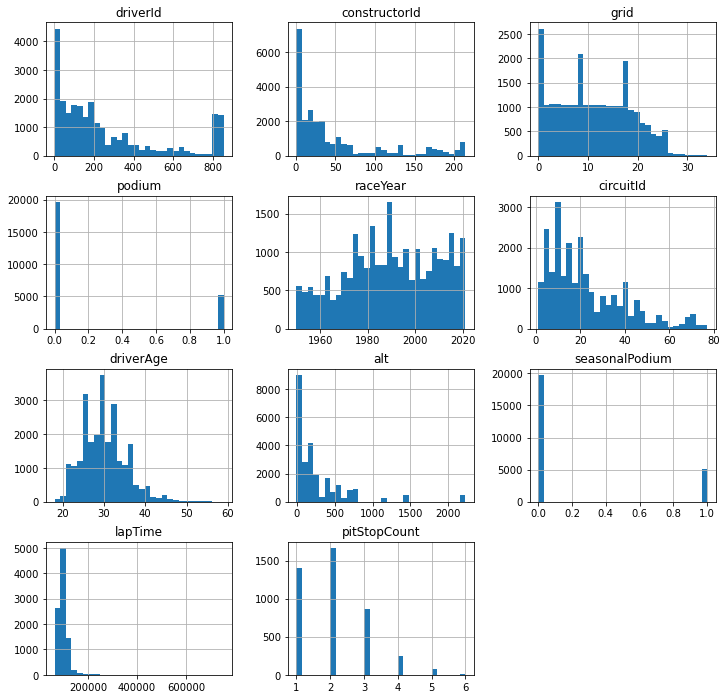

In [156]:
df_naive_baseline.hist(bins=30, figsize=(12,12))
plt.show()

Ignoring the identifier, the histograms show the distribution of continuous values. Before continuing, it should be noted that although a categorical value, podium and 'seasonalPodium' have a suspiciously similar distribution. Since the target variable is being mirrored so closely, 'seasonalPodium' should be put into consideration to be removed entirely.

It can be seen that both 'driverAge' and 'lapTime' are right skewed. For 'lapTime', the skew is significant, and trimming will be necessary. However, for 'driverAge', it should not be trimmed as dropping even a few drivers will inevitably cause a large loss of rows. Transformation should also be done with care, as age is time sensitive, which may cause unwanted correlations.

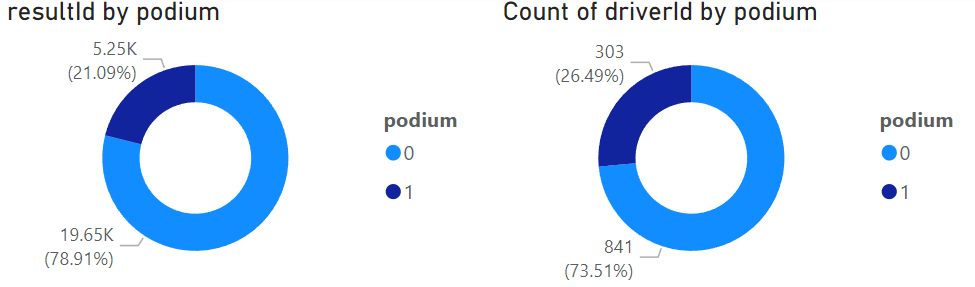

The above pie charts show the percentage of rows which have a True or False value in the target variable by all rows on the left, and by distinct drivers on the right. This shows that about a 5th or ~20% of all rows are True but comes from only ~25% of all drivers.


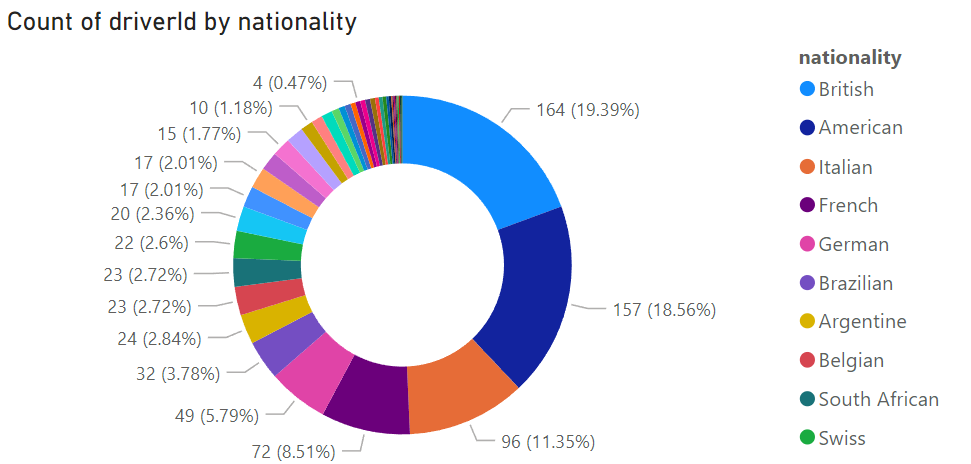


This pie chart shows the nationality of distinct drivers. It can be seen that the majority of drivers are either British, American, or Italian. Combined with the fact that only ~25% of drivers have hit a True in the target variable, there is a possibility for a bias based on nationality.

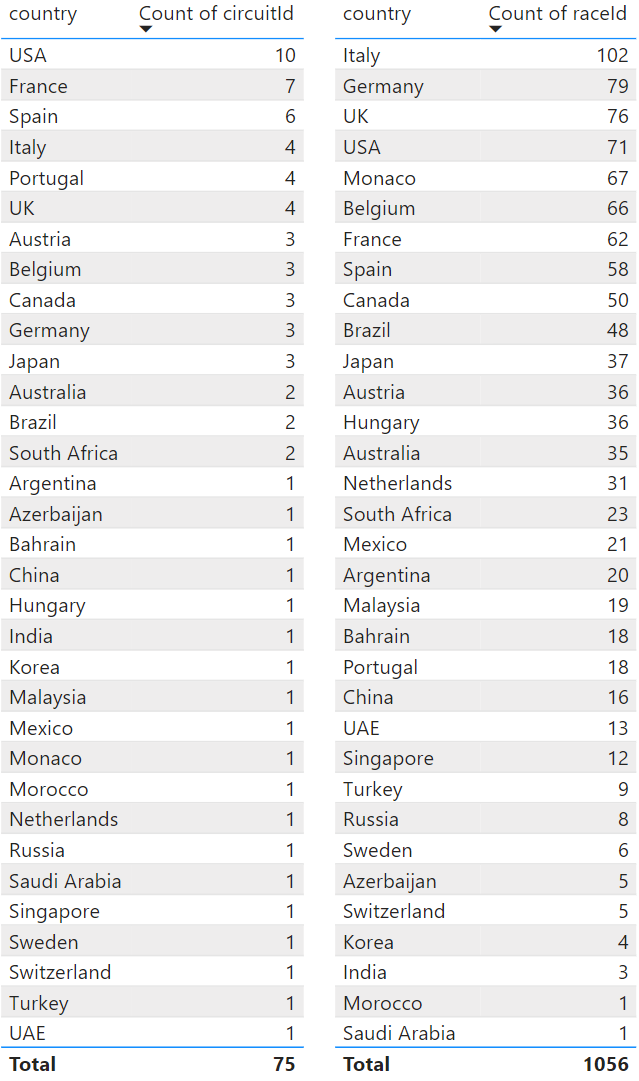

This is simply a table to show the number of tracks in a country on the left, and number of races occurring in a country on the right. This is show that the more tracks there are in a country does not necessarily result in more races occurring in that country, as seen by Italy with 102 races on 4 tracks, compared to USA with 71 races on 10 tracks.

In [157]:
(df_naive_baseline['driverId'].value_counts()>1).value_counts()

True     674
False    172
Name: driverId, dtype: int64

In [158]:
(df_naive_baseline['driverId'].value_counts()>5).value_counts()

True     444
False    402
Name: driverId, dtype: int64

The final and mildly concerning metric discovered is that of all drivers, about ~20% of all drivers have participated on only one race. Additionally, ~50% of all drivers have participated in less than

 4 races. The implications of this is unknown, but it means that are non-insignificant number of drivers have very few data points for their Identifier.

# Outlier Handling<a id = "5"></a>

## Identification<a id = "5.1"></a>

The continuous variables that can have outliers are grid, 'driverAge', alt, and 'lapTime'.

grid is simply the starting position, and some races, especially older ones will have more starting positions, which explains the sharp drop off as it rises.

'driverAge' will not be trimmed or modified in anyway as these outliers are whole drivers, which in addition to their high age mean that they have participated in many races. Modifying this would likely make the accuracy of the model worse.

alt is the altitude of the circuit, and much like 'driverAge', modification of this value will not be done as removing even one circuit results in many rows lost, and the fact that circuits do not suddenly rise or fall into the earth.

This leaves 'lapTime' as the only column require outlier handling. It is relatively safe to modify this data as since it represents the mean 'lapTime', and the outliers in this data will be from rows where that driver has a higher-than-average 'lapTime', meaning that they were never going to be competitive to achieve top 5 or a podium position.



## Capping<a id = "5.2"></a>

For capping, only the upper boundary will be removed. This is because for grid, the lowest values are the drivers which start first, and removing these would result in a huge loss in rows where target variable is True. This is the same as 'lapTime' since shorter 'lapTime' generally mean that the driver drove faster than everyone else, likely result in a higher position.

The outcome of capping results in a loss of 331 rows, which is a small percentage of the ~25 000 rows available, thus it is acceptable.

The histogram for 'lapTime' shows that the longest 'lapTime' left within the uppermost boundary is 140 seconds and there are 2 distinct peaks, at 80 seconds and at just over 100 seconds.

Strangely, the histogram for grid shows little to no change. This means that the upper limit found was the max grid number. This is unexpected and probably an indication that it is best not to mess with it.



## Winsorization<a id = "5.3"></a>

Similar with capping, only the upper boundary will be removed.

Unlike with capping or trimming, there is no issue with loss of row, but the main concern from using winsorization is the change in distribution

Looking at the grid histogram, it can be seen that there is a huge spike at the very end, which is expected. This is acceptable as it would actually make the dataset more consistent throughout but has the issue of increasing the frequency of the that particular grid position. This may have unintended consequences as it would naturally be impossible for 10 cars to all start at the same position.

The 'lapTime' histogram on the other hand, has generated a massive spike, almost high as the natural actual highest density 'lapTime'. This may similarly cause weird frequency issues as the grid winsorization but more importantly will have the artificial effect of making super slow drivers that normally have no chance of winning appear as though their timings are similar to those who might actually win.

Given the disadvantages of the distribution changes from winsorization, capping will be used as a priority, but both will be tested just in case.



# Train Test Split<a id = "6"></a>

The train test split will be the standard 7-3 ratio. It should be noted that the random state is set to 1 for reproducibility, and that missing value imputation, mapping is done, and the number or presence of nulls will be affected by the random state. Random state 9 for example will not produce nulls.

# Missing Value Imputation<a id = "7"></a>

## Identifying Nulls<a id = "7.1"></a>

The nulls left after merging and splitting are only present in 2 columns, 'lapTime' and 'pitStopCount'. These 2 columns are both pertaining to time, with 'lapTime' being the mean time taken for a lap and 'pitStopCount' the count a driver had to enter the pitstop, making them lose time in the lap.

In the X\_train, an alarming amount of at least ~14 000 nulls are present in 'pitStopCount' and ~10 000 in 'lapTime'. This is in comparison to the total number of rows of ~17 000 rows, leaving only about at best ~3 000 fully clean rows present in X\_train.

For both these columns, they are heavily dependant on the circuit. In addition, 'lapTime' is also highly variable to the 'driverId', and 'pitStopCount' will change primarily to the 'constructorId'. This is because the certain circuits are longer than others, resulting in a longer base 'lapTime' as well as more wear and tear on the tyres, requiring more pitStops. The more skilled the driver, the shorter the 'lapTime 'and the better the constructor, and thus cars, the less pitStops are required for maintenance.



## K-Clustering<a id = "7.2"></a>

Since K-Clustering works by clustering and imputing rows that are close to each other, by sorting the dataframes to the 'circuitId', in theory, should give a vaguely similar 'lapTime 'and 'pitStopCount' to the actual amount.

However, even when raising n\_neighbours, the number of clusters, to a ridiculous number as high as 10 000, the distribution of 'lapTimes' is all but removed. Moreover, the method takes an extremely long time to compute, at ~14 seconds which is not ideal if the dataset were to scale. Thus K-Clustering will not be used



## Arbitrary Number Imputation<a id = "7.3"></a>

Since it is known that both the 'lapTime' and 'pitStopCount' will be largely dependent on the 'circuitId', a rough imputation method of using the median of a 'circuitId's' 'lapTime' and 'pitStopCount' to impute will allow for at least a physically possible 'lapTime' and normal 'pitStopCount' to be imputed.

However, it can be seen that there are a ~36 circuits without even a single 'lapTime' and ~44 without a single record of 'pitStopCount'. These nulls cannot be attributed to races that take place far in the past and may have had these values lost as is seen from the high number of nulls in the entire train dataset.

Since there is not a single datapoint to draw upon for many 'circuitIds', the likelihood of accidentally imputing an impossible 'lapTime' or 'pitStopCount', for example making a minimum 2-minute circuit 1 minute, will cause a significant abnormality in the prediction. Thus, this method will also not be used.



## Random Sampling Imputation<a id = "7.4"></a>

With knowledge that attempting fancy K-Clustering will not work and using direct values for a given 'circuitId' is not feasible, the remaining imputation methods will also most likely not work well. Thus, of the remaining methods for continuous variable imputation, mean, median and random sampling, random sampling will cause the least amount of 'change' to the original known values.

Therefore, the imputation pipeline will add a missing indicator column, then randomly impute values for both 'lapTime' and 'pitStopCount'.

It should be noted that placing all null 'pitStopCount'at 0 is a possibility, as in cases where a race is experiencing rain or is cancelled, even for high 'pitStopCount' circuits, there may be no pitStop made during the race.



# Transformation<a id = "8"></a>

There is only 1 variable that is continuous in nature which is 'lapTime'. Thus, only this variable will be considered for transformation. Since there is only one variable, 'lapTime' is relatively easy to simply try all transformers.

From the visualisations, it can be seen that the original distribution has 2 peaks and has outliers at the very top end.

With the exception of the Yeo Johnson transformer, all transforms retain largely the same distribution of the original, with only the presence and position of outliers in the boxplot changing. It is highly likely that retaining the original non-transformed will prove to give the best accuracy, however since it is only one variable, all transformers except Yeo Johnson will be considered.



# Categorical Encoding<a id = "8.1"></a>

The encoding done can be categorised under 2 distinct sections, actual categorical values, and Identifiers. The categorical values will use one-hot encoding, and the identifiers will use frequency encoding to reduce number of columns



## One-Hot Encoding<a id = "8.2"></a>

The columns which will use one-hot encoding will be 'positionText','nationality', and 'country'. During one-hot, there will be cases where columns exist in X\_train but not X\_test, to resolve this, the column mismatch will be dropped. This typically results in a total of 3-10 rows lost.

The final result of one-hot encoding is a total of 86 columns from 15 columns, losing about 5 rows depending on the random seed.



## Frequency Encoding<a id = "8.3"></a>

The columns which will use Frequency encoding will be all the Identifiers. This is to reduce the number of columns generated to below several thousand. It is also possible to use ordinal encoding, however it would result in certain 'driverIds' being perceived by the model as more important than others, when in fact it does not.

Similarly with one-hot encoding, datapoints which exist in the X\_train dataset but not the X\_test exist, resulting in nulls when doing the frequency mapping. Interestingly, nulls never appear in the 'circuitId'. Rows that have a missing mapping will be mapped separately, to ensure all rows have the appropriate frequency mapping. A total of about ~100 rows will have this issue.



# Variable Discretization<a id = "8.4"></a>

The only continuous variable that could have variable discretization is 'lapTime'. The possible discretization methods are equal width, equal frequency, and arbitrary discretization. Using arbitrary discretization is probably not an advisable method $. This leaves equal with and frequency discretization.

Looking at just the histograms, it can be seen that the discretization for width hardly changes. Since it is not possible to tell which method will yield the best accuracy, all will be tested.



# Scaling<a id = "9"></a>

The goal of the scaling is to make all columns have equal weight to each other. The graphs show the before and after scaling based on the different methods used. The main metric is that used to determine the scaling performance is the shape of the graph.

It can be seen that MaxAbs Scalar has the largest spread and 'raceYear' is the largest peak with the rest of the variables. Due to this, MaxAbs Scalar will not be used.

Both Standard and Robust Scaler have similar but not the same scaling outcomes. MinMax Scalar and Mean Normalisation are both similar, with the only change being the way the different variables overlap.

# Machine Learning Modelling<a id = "10"></a>

## Naïve Baseline<a id = "10.1"></a>

The naïve baseline model will serve as the baseline accuracy to beat for the model. The naïve baseline uses all columns and rows from the initial merge of data before any cleansing or transformation.

The baseline accuracy is relatively high, at about ~78%, which is due to the high imbalance between rows with a 'True' target variable against 'False'. As naïve baseline predicts based on the mode found in the target variable, which is 'False' it will have disproportionately high accuracy.

This is rather worrying as the model must beat this high accuracy while not entering above 90% accuracy, so as to avoid overfitting. One way to fix this would be to widen the target variable from top 5 to a larger number, making the ratio of True to False in the target variable more balanced.



## Decision Tree<a id = "10.2"></a>

The decision tree model uses all the cleansing or transformation applied to the data up until scaling. There is a random state applied to the decision tree which will be set to 1.

The decision tree model will always have its train data accuracy set to 100% and its test data never below 79% but never above 80%. It does not make sense that the train data accuracy to be at 100% as that would indicate that the target variable was left in the train data, yet this is not the case. Moreover, regardless of the random state chosen, the model is not able to hit 80% accuracy and above.

The anomaly in the train data at accuracy 100% and the incredibly marginal improvement in the test data accuracy of 1% over the naïve baseline regardless of random state will mean that this type of model is not suited for this case. Therefore, it will not be the final model.



## Logistic Regression<a id = "10.3"></a>

This prediction method will be the model type used to evaluate the data wrangling done. Neither its train or test dataset accuracies are wildly different, and both a at ~85% accuracy, a ~8% improvement over the naïve baseline.

## Model Results<a id = "11"></a>

### Baseline<a id = "11.1"></a>

The baseline for this prediction model will use the first and seemingly most sensible methods that come to mind and attempted.

Target Variable - Top 5

Outlier Handling - Capping

Missing value imputation - Random Sampling, Missing Indicator

Transformation - None

Categorial Encoding - Frequency, One-Hot encoding

Variable Discretization - None

Scaling - Standard Scaler

**Naïve Baseline Test Score - 78.92%**

**Logistic Regression Test Score - 85.21%**

The methods used here will serve as the baseline score to beat, along with the naïve baseline score.

For outlier handling, Winsorisation will also be tested to see the change in test score.

For transformation, none is used in this first case, as it is normally best to keep the original data as far as possible, but as the transformation affects only one variable, all will eventually be tested. The above is applicable to variable discretization as well

All scaling methods will also be tested with the exception of MaxAbs scaler, though it is highly unlikely for the scaling method to affect the test score in a notable degree.

Missing value imputation and Categorical encoding will not be changed, as the methods used there are the only sensible options, with other methods drastically altering the original data.



### Notable Outcome<a id = "11.2"></a>

Target Variable - Top 10

**Naïve Baseline Test Score - 57.16%**

**Decision Tree Test Score - 67.22%**

**Logistic Regression Test Score - 74.52%**

When changing the target variable condition from top 5 final positions in a race to top 10, the test scores change unexpectedly. The naïve baseline accuracy does drop significantly as expected, however the change in decision tree test score is not.

Overall, there is a larger gap in accuracy between the initial naïve baseline and the data wrangled model predictions. This indicates that the models do actually work but also reducing the imbalance in True vs False rows in the target variable will inevitability make the model more accurate.



### Highest Accuracy Outcome<a id = "11.3"></a>

Target Variable - Top 5

Outlier Handling - Capping

Missing value imputation - Random Sampling, Missing Indicator, Arbitrary Imputation

Transformation - None (small negative influence)

Categorial Encoding - Frequency, One-Hot encoding

Variable Discretization - None (small negative influence)

Scaling - Standard Scaler (no major influence)

**Naïve Baseline Test Score - 78.92%**

**Logistic Regression Test Score - 85.28%**

The above is the best result obtained ±1%.

Outlier handling – winsorization performed surprisingly well, giving comparable results of capping. However, it would interact much more negatively in certain cases that I can no longer remember. Overall, it would at best achieve parity performance with capping and have a small negative influence regularly.

Missing value imputation – The effect of the missing indicator a minuscule but consistent positive effect on the accuracy of the model. The same is true for arbitrary imputation, where the ‘pitStopCount’ is set to 0 for missing values.
	Transformation – Using any sort of transformation would consistently produce a negative influence on the accuracy. As seen from the visualisations when doing the transformation, the effect is only in the range of about ~2% at maximum. No transformation was used in this case but this may change, especially if the dataset was larger, transformation could have a possible positive effect.
	
Categorical Encoding – Since ordinal encoding was not tested and given the results during testing in Assignment 1, it is doubtful it would be any way positive, dropping of the variables which required frequency encoding was tested. Since these variables are only the identifiers, it should have little influence. This proved somewhat correct, causing an unexpected full 1% of consistent negative accuracy. 
	
Variable Discretization – Much like transformation, using any sort of discretization would make the model accuracy lower. Unlike transformation however, it is doubtful whether this would ever be useful at any dataset size, as the minute millisecond change in ‘lapTime’ is very important, and discretization would remove that fidelity.

Scaling – Using no scaling method would drop the accuracy by a whole ~6%. However, between the scalers themselves, there was a maximum of ~0.4% change in accuracy. Standard scaler performed the most consistently, whereas maximum absolute scaler would perform the most wildly, sometimes having almost a full percent in change. However, since this varies wildly based on the train test splitting, it is not used.

# Summary<a id = "12"></a>
It is found that changing the target variable to have a smaller imbalance of True against False rows significantly improves the model accuracy. This would suggest that for this prediction model, a more even spread is required for the best accuracy. To do this, the target variable chosen should attempt to be as broad as possible, whilst solving the problem statement. To solve the initially chosen problem statement of top 3 positions, a different model is needed.
	
By semi automating the process of changing wrangling methods, it allowed a better understanding of the influence of every method and made it much easier to compare results. 

Additional possible improvements to the model is to either change the target variable or chose a more suitable prediction method. Acquiring more factors such as ‘weather’ would also significantly improve model performance as not many factors exist within the dataset to definitively predict a result. Moreover, much of the time related data is found to be missing. 


In [159]:
# to force run all the markdown boxes
print()